In [3]:
%matplotlib inline

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import pathlib
import urllib.request

from numpy import asarray
from skimage.io import imread
from pathlib import Path

from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16


### Constants and variables

In [5]:
BASE_DIR = "food/images"
# DATA_DIR = "data_descriptors"

TRAIN_PCT = 0.8
VAL_PCT = 0.1
TEST_PCT = 0.1

BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
IMAGE_HEIGH = 256
IMAGE_WIDTH = 256
IMAGE_SIZE_SHAPE = (256, 256, 3)

FIG_SIZE_WIDTH = 8
FIG_SIZE_HEIGH = 8

EPOCHS = 5
VAL_FREQ = 5
DATASET_SIZE = 0;

# data_dir = pathlib.Path('food/images')
DATA_DIR= pathlib.Path('food/images')

batch_size = 32
img_height = 180
img_width = 180

#### For reader information
The notebook has been shut down around 3 times a day,mostly due to problems in hardware, models are saved when need and loaded when needed, also the numbers of the cells final document is **NOT the actual path of execution**. The Notebook was not restarted at any time so the output of the cells can be kept. 

1. The data is not included - 5.45 GB
2. There is no cached data - 115 GB (only indexes are kept)
3. The saved models are not included 19 models are 5.33 GB (best model CNN-16 315 MB)
4. The log are not included 171 MB of data for 21 models.
5. The documet is done for about 290h of PC working time and 120h - 130h work done by me and I have to apologize for typos.

*Enjoy.*

# Food Classification

### Autor: Plamen Vasilev

##  Abstract

Food is any substance consumed to provide nutritional support for an organism. Food is usually of plant, animal or fungal origin, and contains essential nutrients, such as carbohydrates, fats, proteins, vitamins, or minerals. The substance is ingested by an organism and assimilated by the organism's cells to provide energy, maintain life, or stimulate growth. Different species of animals have different feeding behaviours that satisfy the needs of their unique metabolisms, often evolved to fill a specific ecological niche within specific geographical contexts.

Omnivorous humans are highly adaptable and have adapted to obtain food in many different ecosystems. Historically, humans secured food through two main methods: hunting and gathering and agriculture. As agricultural technologies increased, humans settled into agriculture lifestyles with diets shaped by the agriculture opportunities in their geography. Geographic and cultural differences has led to creation of numerous cuisines and culinary arts, including a wide array of ingredients, herbs, spices, techniques, and dishes. As cultures have mixed through forces like international trade and globalization, ingredients have become more widely available beyond their geographic and cultural origins, creating a cosmopolitan exchange of different food traditions and practices, all of those lead to vast numbers dishes.

With our work we will try to classify just a small part of them (we do NOT have the hardware fore more).



### Content:

1. Introduction 
2. Get Data
3. Pepair the data for modeling.
4. Hardware and Model Choosing.
    1. Hardware
    2. Model Choosing
4. Crating a Convolutional neural network model.
    1. CNN-1
    2. CNN-2
    3. CNN-3
    4. CNN-4
    5. CNN-5
    6. CNN-6
    7. CNN-7
    8. CNN-8
    9. CNN-9
6. Adding Test Dataset
7. Continue with Convolutional neural network model
    1. CNN-10
    2. CNN-11
    3. CNN-12
    4. CNN-13
    5. CNN-14
    6. CNN-15
    7. CNN-16
8. Impoving Training
9. Tuning the best models  
    1. CNN-10
    2. CNN-15
    3. CNN-16
10. Tranfer Learning
    1. TL model 1
    2. TL model 2
    3. VGG19 TL model
        1. Create VGG19 transfer model 
        2. Data VGG19 transfer model 
        3. Train VGG19 transfer model
11. Use the base VGG-19 Model
12. Test he best model
13. Compare results
14. Conclusion
15. References

## 1. Introduction

The goal of our with is to try make a model that will succsesfully tell the food type based on an image. That model can be used for example an android app on your phone. Imagine you are somewere far from home looking at some dish like it and you would like to know what is it, so you just take a picture and the app tell you... Well that the idea at least. 

With the vast veriety of dishes and how any different person cooks it the classification can become a nightmare so we will **"only"** try to classify 101 type of food. We will use a very popular Data Set in Kaggle Food 101, and hopefully create a good Convolutional neural network model, after that comape to others work on this Data set and one Trained working model (VGG19) and finaly we will try tranfer learning with it.

#### Our goal is to predict corectly at least every 2 of 3 Dishes.

So let us begin with the data.

## 2. Get Data

Our data come from: **https://www.kaggle.com/kmader/food41**.

*(to run the notebook yourself you need to download the files from https://www.kaggle.com/kmader/food41 unzip it and put the folders in food named folder)*

The dataset contains a number of different subsets of the full food-101 data. The idea is to make a more exciting simple training set for image analysis than CIFAR10 or MNIST. For this reason the data includes massively downscaled versions of the images to enable quick tests. The data has been reformatted as HDF5 and specifically Keras HDF5Matrix which allows them to be easily read in. The file names indicate the contents of the file. 

Now we reed the data
### 2.1 Read the Data

#### First we will get the class names

In [6]:
class_filenames = {}
for class_dir in os.listdir(BASE_DIR):
    class_dir_parts = class_dir.split(" ", maxsplit = 2)
    class_name = f"{class_dir_parts[0]}"
    print(class_dir)
    
    full_class_dir = os.path.join(BASE_DIR, class_dir)
    files_in_class_dir = os.listdir(full_class_dir)
    files_in_class_dir = [os.path.join(full_class_dir, file) for file in files_in_class_dir]
    files_in_class_dir = [os.path.abspath(file) for file in files_in_class_dir]
    
    if class_name not in class_filenames:
        class_filenames[class_name] = []
    
    class_filenames[class_name].extend(files_in_class_dir)

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
sa

#### Next we need the files for those classes
Since we got our class names lets make a DataFreame with filename (in our case this will be the absolute path) and the name of the class.

In [7]:
class_filenames_df = pd.DataFrame({"filename": [], "class": []})

for (class_name, filenames) in class_filenames.items():
    records = [{"filename": filename, "class": class_name} for filename in filenames]
    class_filenames_df = class_filenames_df.append(records)

In [8]:
class_filenames_df

filename      class
0    C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...  apple_pie
1    C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...  apple_pie
2    C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...  apple_pie
3    C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...  apple_pie
4    C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...  apple_pie
..                                                 ...        ...
995  C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...    waffles
996  C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...    waffles
997  C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...    waffles
998  C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...    waffles
999  C:\Users\XellFIRE\Desktop\AI\DeepLearning\10. ...    waffles

[101000 rows x 2 columns]

Our data frame is ready and we can see that it contains 101 000 samples.

We need the be sure about their distribution do we have a dominant class or one with too few samples and so on.
To visualize this better we will make a bar chart.

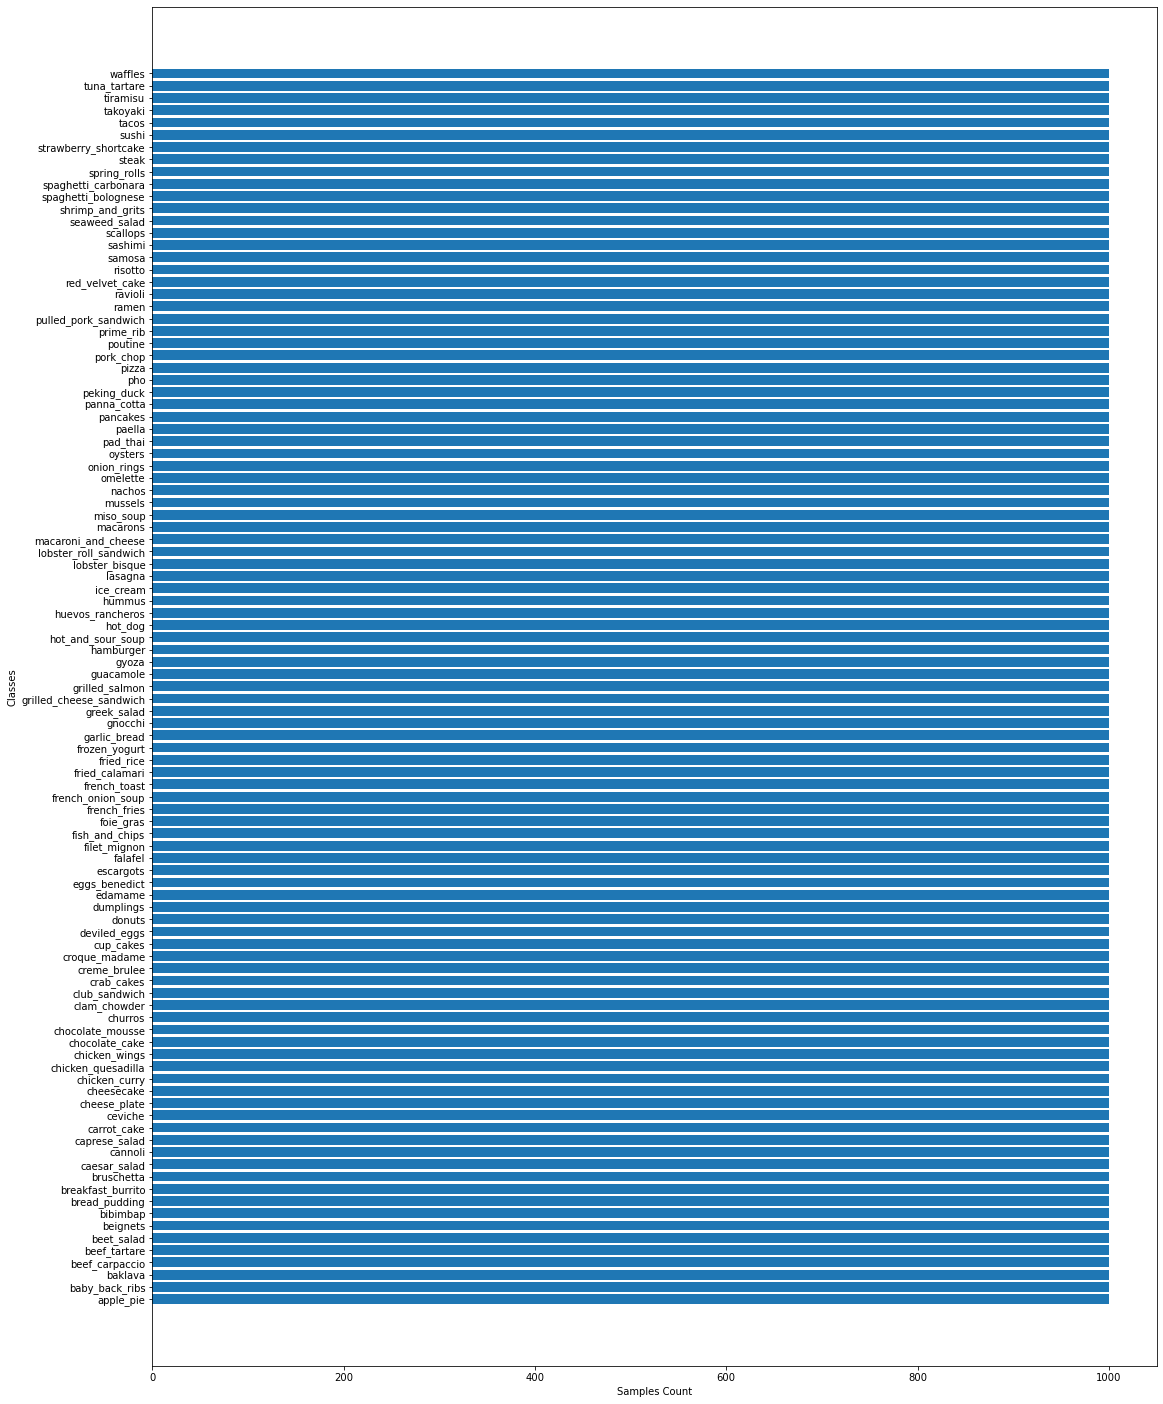

In [9]:
groups_by_num_images = class_filenames_df.groupby("class").size()
plt.figure(figsize=(18,25))
plt.barh(groups_by_num_images.index, groups_by_num_images)
plt.xlabel("Samples Count")
plt.ylabel("Classes")
plt.show()

In [10]:
groups_by_num_images

class
apple_pie         1000
baby_back_ribs    1000
baklava           1000
beef_carpaccio    1000
beef_tartare      1000
                  ... 
tacos             1000
takoyaki          1000
tiramisu          1000
tuna_tartare      1000
waffles           1000
Length: 101, dtype: int64

It looks perfect (well the credit for this is for the people who created this dataset). 

We have 101 classes with 1000 images for each.

Now we need to prepair data for modeling.

## 3 Prepare data for modeling

By using TF karas API this process is realy simple **preprocessing.image_dataset_from_directory()** - function.

In shor this function will get all the data in the given file path and if the data is structured well (in our case it is), it will create a Tensorflow BatchDataset with lables the subfolder namas and samples for each lable will be each file in this  subfolder.

More importantly the images will be Shuffled and the function does that by Default, then it has a hyperparameter image_size to resize images to after they are read from disk. Since the pipeline processes batches of images that must all have the same size, this must be provided, after that we will provide batch_size in our case will be 32 so that means the network will be trained 32 samples at one time.

Finaly we will use validation_split hyperprameter to split the data to traing and validation datasets we will use 90% to train and 10% vor validation. For testing we will provide image and see if the neural network can classify it correctly.



In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(IMAGE_HEIGH, IMAGE_WIDTH),
  batch_size=batch_size)

Found 101000 files belonging to 101 classes.
Using 90900 files for training.


In [12]:
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [13]:
train_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.1,
  subset="training",
  seed=123,
  batch_size=batch_size)

Found 101000 files belonging to 101 classes.
Using 90900 files for training.


The training set seams to be ok 90900 files to 101 classes 90% as we wanted.

In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(IMAGE_HEIGH, IMAGE_WIDTH),
  batch_size=batch_size)

Found 101000 files belonging to 101 classes.
Using 10100 files for validation.


The validation set seams to be ok too 10100 files to 101 classes 90% as we wanted. 

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


Batch size is as we want 32 images with shape of 256 on 256 pixels with 3 channels (red green blue) and there are 32 labes for the batch.

In [16]:
class_names = val_ds.class_names
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [17]:
len(class_names)

101

In [18]:
num_classes = len(class_names)

Lables count is 101 as expected, there is one last thing beffor we start making models, to confirm that there pictures in the dataset.

In [19]:
def plot_images(data):
    plt.figure(figsize=(10, 10))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

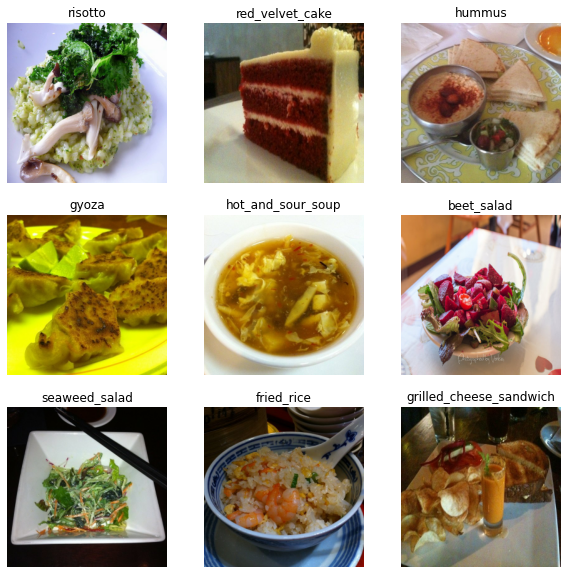

In [20]:
plot_images(train_ds)

By the look of the images they seamed to be correct we are set with the data and we can start modeling.

## 4. Hardware and Model Choosing

### 4.1 Hardware

Before we start here is the machine that our modeling will be done on.

**Intel I5 CPU 6600K - 3.5 Ghz**

**16 GB RAM DDR4 - 2400 Mhz**

**Nvidia GPU 1060 GTX - 6 Gb**

Next cell will be with variables that we might need.

In [34]:
reg_01 = L1L2(l1 = 0.01, l2 = 0.01)
reg_001 = L1L2(l1 = 0.001, l2 = 0.001)

### 4.2 Model Choosing

#### What type of Neural network model will we use ?

# Convolutional neural network 

Well in neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN image classifications takes an input image, process it and classify it under certain categories (Eg., Dog, Cat, Tiger, Lion). Computers sees an input image as array of pixels and it depends on the image resolution. Based on the image resolution, it will see h x w x d( h = Height, w = Width, d = Dimension ). Eg., An image of 6 x 6 x 3 array of matrix of RGB (3 refers to RGB values) and an image of 4 x 4 x 1 array of matrix of grayscale image.

Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1 or . The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

![alt text](cnn_arhitecture.jpeg)

## For our CNN we will use Sequential model (one layer after another ine by one as a sequence) 


### Input layer
In our **first layer will be for our data** that need to be Rescaled in numbers from 0 to 1 because now is from 0 to 255 sugesting the value of pixel color channels, so we will use a **layers.experimental.preprocessing.Rescaling** from keras API and we will divide every number with 255 and as a hyperparameter we will provide the imput_shape.

### Convolution layer
Convolution is the first layer to extract features from an input image. Convolution preserves the relationship between pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs such as image matrix and a filter or kernel.

![alt text](convolution_layer.png)

Consider a 5 x 5 whose image pixel values are 0, 1 and filter matrix 3 x 3 as shown in below

![alt text](convolution_layer_1.png)

Then the convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called “Feature Map” as output shown in below

![alt text](convolution_layer_2.gif)

Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters. The below example shows various convolution image after applying different types of filters (Kernels).

![alt text](convolution_layer_3.png)

#### Padding
Sometimes filter does not fit perfectly fit the input image. We have two options:
1. Pad the picture with zeros (zero-padding) so that it fits
2. Drop the part of the image where the filter did not fit. This is called valid padding which keeps only valid part of the image.

So if we have padding when appling the convolution layer the image losses pixels equalto to *image hight - filter hight - 1 (on 5 x 5 image input with filer of 3 x 3, the result will be smaller images with size 3 x 3 so if we apply one more filter the image will be just one pixel)* and we dont want that. That is why we will use hyperparameter **padding** with value **same** so that the output size remains unchanged.

#### Non Linearity (ReLU)

ReLU stands for Rectified Linear Unit for a non-linear operation. The output is ƒ(x) = max(0,x).
Why ReLU is important : ReLU’s purpose is to introduce non-linearity in our ConvNet. Since, the real world data would want our ConvNet to learn would be non-negative linear values.

![alt text](relu.png)

There are other non linear functions such as tanh or sigmoid that can also be used instead of ReLU. Most of the data scientists use ReLU since performance wise ReLU is better than the other two.

### Pooling Layer
Pooling layers section would reduce the number of parameters when the images are too large. Spatial pooling also called subsampling or downsampling which reduces the dimensionality of each map but retains important information. Spatial pooling can be of different types:
1. Max Pooling
2. Average Pooling
3. Sum Pooling
Max pooling takes the largest element from the rectified feature map. Taking the largest element could also take the average pooling. Sum of all elements in the feature map call as sum pooling.

![alt text](pooling_layer.png)

For our work will use **MaxPooling2D()** so we will keep the largest element from the rectified feature map

### Flattening Layer 

After finishing the  Input layerm Convolution layers and Pooling Layers, we're supposed to have a pooled feature map by now. As the name of this Layer implies, we are literally going to flatten our pooled feature map into a column like in the image below.

![alt text](flatten1.png)

The reason we do this is that we're going to need to insert this data into an artificial neural network later on.

![alt text](flattening_2.png)

As you see in the image above, we have multiple pooled feature maps from the previous step.

What happens after the flattening step is that you end up with a long vector of input data that you then pass through the artificial neural network to have it processed further.

### Fully Connected Layer

Here's where artificial neural networks and convolutional neural networks collide as we add the former to our latter. It's here that the process of creating a convolutional neural network begins to take a more complex and sophisticated turn.

Input layer contains the vector of data that was created in the **Flattening Layer**. The features that we distilled throughout the previous steps are encoded in this vector.

At this point, they are already sufficient for a fair degree of accuracy in recognizing classes. We now want to take it to the next level in terms of complexity and precision.

![alt text](fully_connected.png)

The role of the artificial neural network is to take this data and combine the features into a wider variety of attributes in **Dance layers**, that make the convolutional network more capable of classifying images, which is the **whole purpose from creating a convolutional neural network.**

Finally, we have an activation function such as softmax or sigmoid to classify the outputs as cat, dog, car, truck etc.,

![alt text](result_cnn.png)

## Compiling the model

For our CNN compilation we choose the **optimizers.Adam** optimizer and **losses.SparseCategoricalCrossentropy loss function**. To view training and validation accuracy for each training epoch, pass the **metrics argument 'accuracy'**.

**Adam** is an adaptive learning rate method, which means, it computes individual learning rates for different parameters. Its name is derived from adaptive moment estimation, and the reason it’s called that is because Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network

**SparseCategoricalCrossentropy** - Computes the cross-entropy loss between true labels and predicted labels.Cross-entropy is used when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.**SparseCategoricalCrossentropy** is used when there are more then two classes for classification.

**Metrics Accuracy** - Calculates how often predictions equal labels.

## Training the model

When training the model we will use of course the **training set** we will have validation from, so we will provide our **validation set**, the number of **epochs** will differ, and there will be a callback - **TensorBoard(log_dir = "logs_{name of model}")**

**Epochs** is one pass through all of the training data.

Callbacks are an essential part of training deep learning models, providing a high degree of control over many aspects of your model training.

**TensorBoard** is one of the best callbacks if you want to visualize the training summary for your model. This callback generates the logs for TensorBoard, which you can later launch to visualize the progress of your training. We will cover the details for TensorBoard in a separate article.

## 5. Crating a Convolutional neural network model.

#### Here we will make a number of model as much as we can the time we give ourselfs is a WEEK for training them and choose the best for further training and finaly test.

#### Models will be called - CNN_{number}
Where number is a number by order of creation a Model.

#### All models will be saved in "saved_models" folder named "cnn_{number}"
Where number is a number by order of creation a Model.

#### The training information will be stored in Directories "logs_cnn_{number}"
Where number is a number by order of creation a Model.

### 5.1 CNN-1 model

The first model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function.

In [12]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Oru next step is compile the model and we will choose  choose the optimizers.Adam optimizer and losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We will start with 10 epochs seam a resonamble round number.

In [15]:
epochs=10

When we fitting our model we will validate on every epoch and save our logs in a directory.

In [16]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[TensorBoard(log_dir = "logs_tranfer")])

Epoch 1/10
2525/2525 [==============================] - 383s 151ms/step - loss: 4.3629 - accuracy: 0.0478 - val_loss: 3.7805 - val_accuracy: 0.1270
Epoch 2/10
2525/2525 [==============================] - 420s 166ms/step - loss: 3.6477 - accuracy: 0.1508 - val_loss: 3.5234 - val_accuracy: 0.1766
Epoch 3/10
2525/2525 [==============================] - 455s 180ms/step - loss: 3.1656 - accuracy: 0.2380 - val_loss: 3.5629 - val_accuracy: 0.1904
Epoch 4/10
2525/2525 [==============================] - 488s 193ms/step - loss: 2.6895 - accuracy: 0.3303 - val_loss: 3.9661 - val_accuracy: 0.1665
Epoch 5/10
2525/2525 [==============================] - 529s 209ms/step - loss: 2.2031 - accuracy: 0.4348 - val_loss: 4.4478 - val_accuracy: 0.1584
Epoch 6/10
2525/2525 [==============================] - 586s 232ms/step - loss: 1.7466 - accuracy: 0.5377 - val_loss: 5.3636 - val_accuracy: 0.1445
Epoch 7/10
2525/2525 [==============================] - 626s 248ms/step - loss: 1.3671 - accuracy: 0.6293 - val_

Our model is trained and we have results of loss: 0.6941 - accuracy: 0.7921 - val_loss: 9.7347 - val_accuracy: 0.1211.

That suggest that the model is ok on training with our goal of 66% at least but way far when it validates with new data we have not hight but huge variance.

To be more clear we will make a function to visualize the training of the model.

In [25]:
def display_history(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    
    plt.figure(figsize=(FIG_SIZE_WIDTH, FIG_SIZE_HEIGH))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

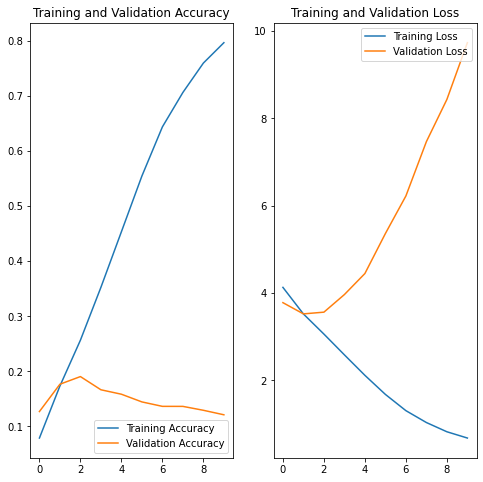

In [18]:
display_history(history,epochs)

Well the result is obvious we need the Orange line (validation) close to Blue line (Traing), but they are var of our model knows the data not so well, considering that the images have some overlapping like open tako looks like salad ice cream sometimes looks like cup cake and so on, but is doing very poorly on the new images.

before we continue we will save our work so we wont lose the training data because we last traing took about 1:40 h but we will have much longer traings and everything can happen on the pc we are working on.

In [19]:
model.save('saved_models/cnn_1')

INFO:tensorflow:Assets written to: saved_models/cnn_1\assets


#### Resulst CNN-1 model loss: 0.6941 - accuracy: 0.7921 - val_loss: 9.7347 - val_accuracy: 0.1211.

We need some regularization to make our model have better generalization of the images so it can do better on new data, we will do this on oune nex model CNN-2

### 5.2 CNN-2 model

For our next model we will Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

And lets visualize the what data_augmentation doeas on images.

In [21]:
def pot_images_with_data_augmentation(data, data_augmentation):
    plt.figure(figsize=(10, 10))
    for images, _ in data.take(1):
        for i in range(9):
            augmented_images = data_augmentation(images)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")

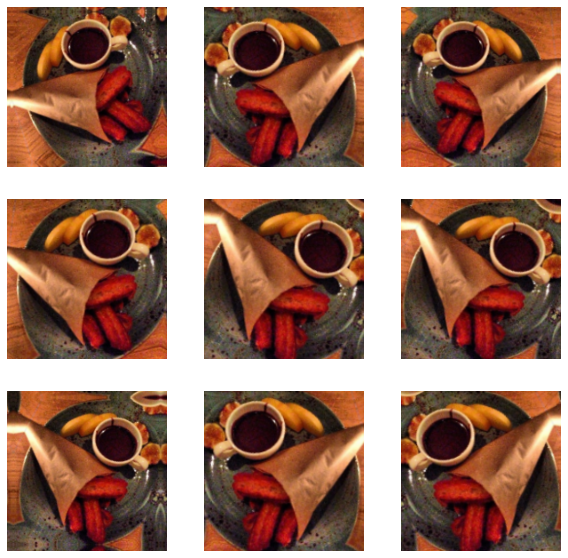

In [22]:
pot_images_with_data_augmentation(train_ds,data_augmentation)

We see that the same image has been a little zoome a little moved on left or right axes and flipped horizontaly this will be done randomly each epoch, so this is how we will make a close but different image so our dataset can be larger and this is one more way to reduce hight viariance.

Also as we mentioned befor we will use some regularization, other than Max pooling which by it self does a little regularization by itself reducing image size by 4 and choosing lagest number of 4, we will use drop out after the flatten layer wit value of 0.2 that means the Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

In [23]:
model_2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = "softmax")
])

In [24]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

Trainable params stays ruffly the same now we will train on same numbe of epochs 10.

In [26]:
epochs = 10

In [27]:
history = model_2.fit(train_ds,validation_data=val_ds,epochs=epochs,callbacks=[TensorBoard()])

Epoch 1/10
2525/2525 [==============================] - 1004s 397ms/step - loss: 4.4755 - accuracy: 0.0299 - val_loss: 3.9116 - val_accuracy: 0.1062
Epoch 2/10
2525/2525 [==============================] - 1091s 431ms/step - loss: 3.8628 - accuracy: 0.1152 - val_loss: 3.6806 - val_accuracy: 0.1438
Epoch 3/10
2525/2525 [==============================] - 1187s 469ms/step - loss: 3.5711 - accuracy: 0.1616 - val_loss: 3.5777 - val_accuracy: 0.1732
Epoch 4/10
2525/2525 [==============================] - 1301s 515ms/step - loss: 3.4330 - accuracy: 0.1899 - val_loss: 3.4465 - val_accuracy: 0.1920
Epoch 5/10
2525/2525 [==============================] - 1308s 517ms/step - loss: 3.3206 - accuracy: 0.2088 - val_loss: 3.3483 - val_accuracy: 0.2080
Epoch 6/10
2525/2525 [==============================] - 1252s 495ms/step - loss: 3.2510 - accuracy: 0.2228 - val_loss: 3.3423 - val_accuracy: 0.2161
Epoch 7/10
2525/2525 [==============================] - 1339s 530ms/step - loss: 3.1887 - accuracy: 0.2349

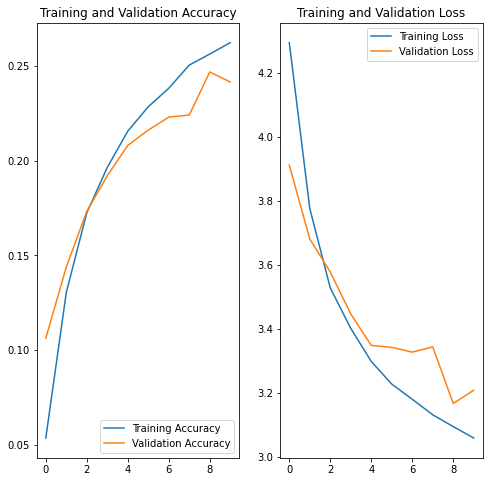

In [28]:
display_history(history,epochs)

In [29]:
model_2.save('saved_models/cnn_2')

INFO:tensorflow:Assets written to: saved_models/cnn_2\assets


##### Results so far loss: 3.0639 - accuracy: 0.2602 - val_loss: 3.2086 - val_accuracy: 0.2415

Well our goal to reduce overfitting is done but on what price our model has only 26% Accuracy and that is extreamly bad and this step took us 3h and 45 min, but we will do some more traing to see if this model can perform better.

In [30]:
tf.keras.backend.clear_session()

In [31]:
epochs = 5

In [32]:
history = model_2.fit(train_ds,validation_data=val_ds,epochs=epochs,callbacks=[TensorBoard()])

Epoch 1/5
2525/2525 [==============================] - 2820s 1s/step - loss: 3.0228 - accuracy: 0.2702 - val_loss: 3.1876 - val_accuracy: 0.2476
Epoch 2/5
2525/2525 [==============================] - 2819s 1s/step - loss: 3.0009 - accuracy: 0.2741 - val_loss: 3.1403 - val_accuracy: 0.2566
Epoch 3/5
2525/2525 [==============================] - 2868s 1s/step - loss: 2.9729 - accuracy: 0.2791 - val_loss: 3.0813 - val_accuracy: 0.2651
Epoch 4/5
2525/2525 [==============================] - 3089s 1s/step - loss: 2.9540 - accuracy: 0.2838 - val_loss: 3.2494 - val_accuracy: 0.2483
Epoch 5/5
2525/2525 [==============================] - 3165s 1s/step - loss: 2.9333 - accuracy: 0.2875 - val_loss: 3.1251 - val_accuracy: 0.2614


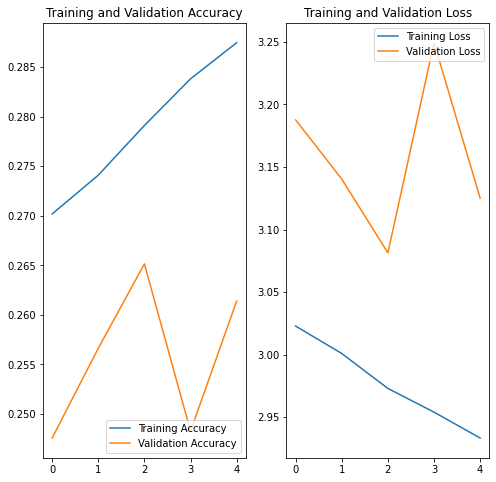

In [33]:
display_history(history,epochs)

In [34]:
model_2.save('saved_models/cnn_2')

INFO:tensorflow:Assets written to: saved_models/cnn_2\assets


In [35]:
tf.keras.backend.clear_session()

In [2]:
loaded_cnn_2_model = tf.keras.models.load_model('saved_models/cnn_2')

In [18]:
epochs = 5

In [10]:
history = loaded_cnn_2_model.fit(train_ds,validation_data=val_ds,epochs=epochs,callbacks=[TensorBoard(log_dir = "logs_cnn_2")])

Epoch 1/5
2525/2525 [==============================] - 699s 274ms/step - loss: 2.9150 - accuracy: 0.2897 - val_loss: 3.2091 - val_accuracy: 0.2506
Epoch 2/5
2525/2525 [==============================] - 551s 218ms/step - loss: 2.8993 - accuracy: 0.2956 - val_loss: 3.1739 - val_accuracy: 0.2651os - ETA: 3:47 - loss: 2.9101 - accuracy - ETA - ETA: 2:53 - loss: 2.9 - ETA: 2:51 - loss: 2.9063 - accu - ETA: 2:50 - loss: 2.9062 - ac - ETA: 2:49 - loss: 2.9059 - accuracy:  - ETA: 1:09 - loss: 2.9028  - ETA: - ETA: 10s - lo - ETA: 
Epoch 3/5
2525/2525 [==============================] - 559s 221ms/step - loss: 2.8699 - accuracy: 0.2991 - val_loss: 3.0801 - val_accuracy: 0.2777
Epoch 4/5
2525/2525 [==============================] - 610s 241ms/step - loss: 2.8567 - accuracy: 0.3016 - val_loss: 3.0771 - val_accuracy: 0.27328574 - accu
Epoch 5/5
2525/2525 [==============================] - 685s 271ms/step - loss: 2.8359 - accuracy: 0.3077 - val_loss: 3.0984 - val_accuracy: 0.2704


In [11]:
history = loaded_cnn_2_model.fit(
    train_ds,validation_data=val_ds,epochs=epochs,callbacks=[TensorBoard(log_dir = "logs_cnn_2")])

Epoch 1/5
2525/2525 [==============================] - 741s 293ms/step - loss: 2.8192 - accuracy: 0.3093 - val_loss: 3.1767 - val_accuracy: 0.2594
Epoch 2/5
2525/2525 [==============================] - 791s 313ms/step - loss: 2.8095 - accuracy: 0.3131 - val_loss: 3.1982 - val_accuracy: 0.2643
Epoch 3/5
2525/2525 [==============================] - 867s 343ms/step - loss: 2.7919 - accuracy: 0.3171 - val_loss: 3.1523 - val_accuracy: 0.2644
Epoch 4/5
2525/2525 [==============================] - 928s 367ms/step - loss: 2.7792 - accuracy: 0.3200 - val_loss: 3.0573 - val_accuracy: 0.2775
Epoch 5/5
2525/2525 [==============================] - 1115s 441ms/step - loss: 2.7756 - accuracy: 0.3184 - val_loss: 3.2057 - val_accuracy: 0.2591


In [14]:
loaded_cnn_2_model.save('saved_models/cnn_2')

INFO:tensorflow:Assets written to: saved_models/cnn_2\assets


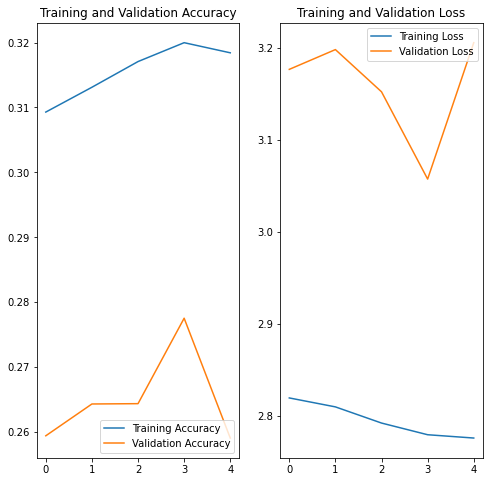

In [21]:
display_history(history,epochs)

In [22]:
tf.keras.backend.clear_session()

In [7]:
loaded_cnn_2_model = tf.keras.models.load_model('saved_models/cnn_2')

In [8]:
epochs = 10

In [9]:
history = loaded_cnn_2_model.fit(
    train_ds,validation_data=val_ds,epochs=epochs,callbacks=[TensorBoard(log_dir = "logs_cnn_2")])

Epoch 1/10
2525/2525 [==============================] - 470s 185ms/step - loss: 2.7238 - accuracy: 0.3309 - val_loss: 3.1157 - val_accuracy: 0.2807
Epoch 2/10
2525/2525 [==============================] - 500s 198ms/step - loss: 2.7156 - accuracy: 0.3326 - val_loss: 3.1371 - val_accuracy: 0.2783
Epoch 3/10
2525/2525 [==============================] - 539s 213ms/step - loss: 2.7073 - accuracy: 0.3343 - val_loss: 3.0218 - val_accuracy: 0.2918
Epoch 4/10
2525/2525 [==============================] - 578s 228ms/step - loss: 2.7002 - accuracy: 0.3357 - val_loss: 3.1666 - val_accuracy: 0.2795ss: 2.7025 - accuracy:  - ETA: 43s - loss: 2.7 - ETA: 13s - los - ETA: 9s - loss: 2.7009 - accuracy: 0.33 - ETA: 9s - loss: 2.7006 - accu - E
Epoch 5/10
2525/2525 [==============================] - 629s 249ms/step - loss: 2.6945 - accuracy: 0.3379 - val_loss: 3.1135 - val_accuracy: 0.2751
Epoch 6/10
2525/2525 [==============================] - 688s 272ms/step - loss: 2.6837 - accuracy: 0.3394 - val_loss: 3

In [242]:
loaded_cnn_2_model.save('saved_models/cnn_2')

INFO:tensorflow:Assets written to: saved_models/cnn_2\assets


In [40]:
FIG_SIZE_WIDTH = 16

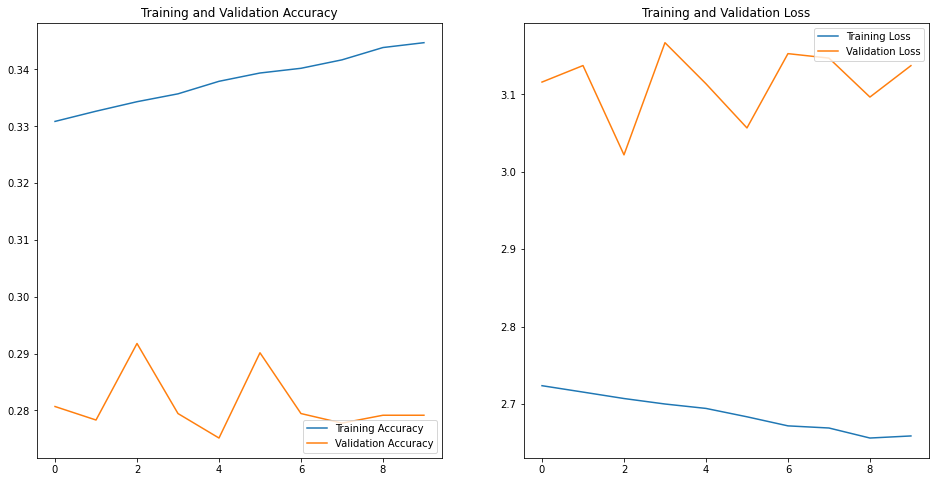

In [13]:
display_history(history,epochs)

In [ ]:
loaded_cnn_2_model = tf.keras.models.load_model('saved_models/cnn_2')

#### Resulst CNN-2 loss: 2.6589 - accuracy: 0.3447 - val_loss: 3.1369 - val_accuracy: 0.2792

After 10h of traing we just just a little better but far from our goal so we nned some othe model architecture.

And we will move to our next model CNN-3

### 5.3 CNN-3 model

Here we will remove the regularization so we can get the maximum accuracy and do some regularization from there. 

We will remove MaxPool layers Dropout layer and Data augmentation layers.

In [15]:
model_3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128,activation = "relu"),
  layers.Dense(num_classes,activation = "softmax")
])

In [16]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [17]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We will make small change and here we will train on 20 epochs.

In [18]:
epochs = 20

In [19]:
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[TensorBoard(log_dir = "logs_cnn_3")])

Epoch 1/20
2525/2525 [==============================] - 1159s 458ms/step - loss: 5.0495 - accuracy: 0.0201 - val_loss: 4.2746 - val_accuracy: 0.0540
Epoch 2/20
2525/2525 [==============================] - 1027s 407ms/step - loss: 4.1090 - accuracy: 0.0822 - val_loss: 4.3177 - val_accuracy: 0.0777
Epoch 3/20
2525/2525 [==============================] - 1014s 401ms/step - loss: 2.9024 - accuracy: 0.2961 - val_loss: 6.2601 - val_accuracy: 0.0607
Epoch 4/20
2525/2525 [==============================] - 1041s 412ms/step - loss: 0.9310 - accuracy: 0.7464 - val_loss: 10.2586 - val_accuracy: 0.0509
Epoch 5/20
2525/2525 [==============================] - 1065s 422ms/step - loss: 0.2739 - accuracy: 0.9304 - val_loss: 11.8884 - val_accuracy: 0.0509
Epoch 6/20
2525/2525 [==============================] - 1088s 431ms/step - loss: 0.1798 - accuracy: 0.9542 - val_loss: 12.8763 - val_accuracy: 0.0520
Epoch 7/20
2525/2525 [==============================] - 1117s 442ms/step - loss: 0.1559 - accuracy: 0.9

In [20]:
model_3.save('saved_models/cnn_3')

INFO:tensorflow:Assets written to: saved_models/cnn_3\assets


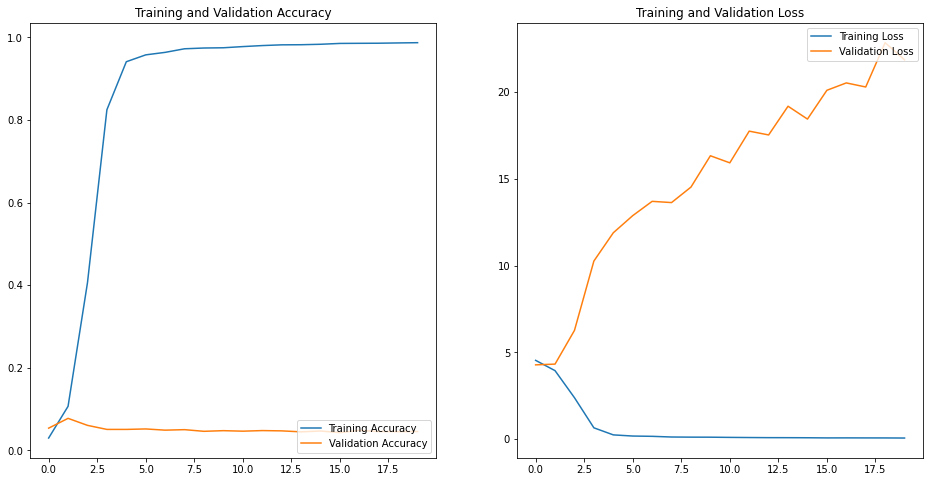

In [21]:
display_history(history,epochs)

#### Resulst CNN-3 loss: 0.0553 - accuracy: 0.9862 - val_loss: 21.8603 - val_accuracy: 0.0457

After 8.5 h of we have our result great accuracy what we wanted from here we just need the right regularization se we can make our model work for new data. we will try that on CNN-4.

But befor we do that les us see how our model predict new pictures, because at the end of the day that is the point of it.

We will load our 3 models so far first.


In [44]:
loaded_cnn_1_model = tf.keras.models.load_model('saved_models/cnn_1')
loaded_cnn_2_model = tf.keras.models.load_model('saved_models/cnn_2')
loaded_cnn_3_model = tf.keras.models.load_model('saved_models/cnn_3')

In [32]:
loaded_cnn_1_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [48]:
loaded_cnn_2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [49]:
loaded_cnn_3_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

Next we will make a function so we can predict this more then ones and wont be needing to copy code.

In [46]:
def prediction_confindence(model,height,width,title,url):
    file_url = f"{url}"
    file_path = tf.keras.utils.get_file(f'{title}', origin=file_url)

    img = keras.preprocessing.image.load_img(
        file_path, target_size=(height, width)
    )
    img_array = keras.preprocessing.image.img_to_array(img) 
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    print(
        "This image most likely belongs to {} with a {} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    image = imread(file_path)
    plt.imshow(image)
    plt.title(title)
    plt.show()

This image most likely belongs to poutine with a 2.149128168821335 percent confidence.


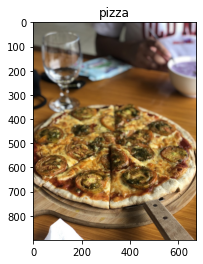

This image most likely belongs to chocolate_cake with a 2.5833765044808388 percent confidence.


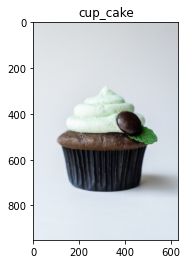

This image most likely belongs to sushi with a 1.8185624852776527 percent confidence.


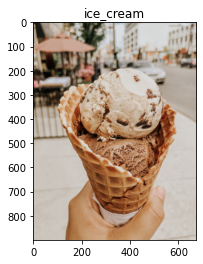

This image most likely belongs to escargots with a 1.403820514678955 percent confidence.


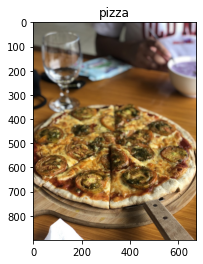

This image most likely belongs to foie_gras with a 1.1273403652012348 percent confidence.


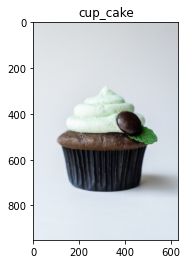

This image most likely belongs to cannoli with a 1.5963457524776459 percent confidence.


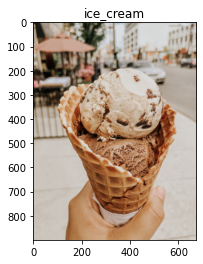

This image most likely belongs to fried_rice with a 2.646343410015106 percent confidence.


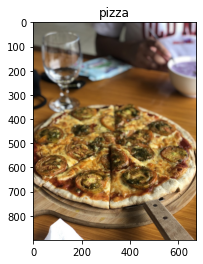

This image most likely belongs to frozen_yogurt with a 1.5146679244935513 percent confidence.


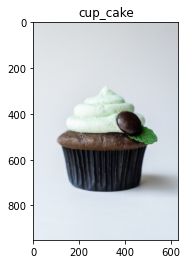

This image most likely belongs to fried_rice with a 2.644176222383976 percent confidence.


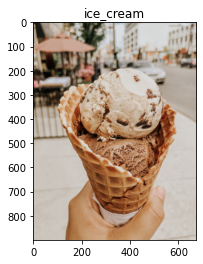

In [59]:
prediction_confindence(loaded_cnn_1_model,img_height, img_width, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(loaded_cnn_1_model,img_height, img_width,"cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(loaded_cnn_1_model,img_height, img_width,"ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

prediction_confindence(loaded_cnn_2_model,img_height, img_width, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(loaded_cnn_2_model,img_height, img_width,"cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(loaded_cnn_2_model,img_height, img_width,"ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

prediction_confindence(loaded_cnn_3_model,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(loaded_cnn_3_model,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(loaded_cnn_3_model,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

Our first 3 models are distater no one correct prediction and prediction are with 1 and 2 percent confidence.

We need something a lot better.

### 5.4 CNN-4 model

In our 4th attempt we will add BatchNormalization layer after each Conv2D layer, MaxPool layer and Dence layer.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [13]:
model_4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax")
])

In [14]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      1

We will start on 5 epochs beacuse we have limited time and we do not want to waste it if the model does realy bad from the begining.

In [15]:
model_4.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [16]:
epochs = 5

In [17]:
history = model_4.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_4")])

Epoch 1/5
2525/2525 [==============================] - 586s 231ms/step - loss: 4.1186 - accuracy: 0.0909 - val_loss: 4.2061 - val_accuracy: 0.1254
Epoch 2/5
2525/2525 [==============================] - 621s 246ms/step - loss: 3.2878 - accuracy: 0.2232 - val_loss: 3.2300 - val_accuracy: 0.2423
Epoch 3/5
2525/2525 [==============================] - 652s 258ms/step - loss: 2.5443 - accuracy: 0.3755 - val_loss: 3.5286 - val_accuracy: 0.2237
Epoch 4/5
2525/2525 [==============================] - 719s 284ms/step - loss: 1.1125 - accuracy: 0.7129 - val_loss: 4.4659 - val_accuracy: 0.2143
Epoch 5/5
2525/2525 [==============================] - 778s 308ms/step - loss: 0.1424 - accuracy: 0.9647 - val_loss: 5.5963 - val_accuracy: 0.2113


#### Resulst CNN-4 0.1424 - accuracy: 0.9647 - val_loss: 5.5963 - val_accuracy: 0.2113

Traing about 1h

Well a little better than CNN-4

Now lets see the predictions.

This image most likely belongs to mussels with a 2.177993208169937 percent confidence.


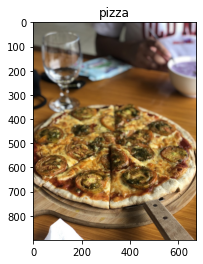

This image most likely belongs to chocolate_cake with a 2.280155196785927 percent confidence.


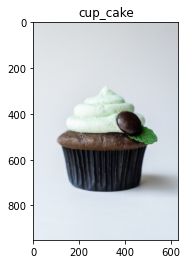

This image most likely belongs to ice_cream with a 1.4337300322949886 percent confidence.


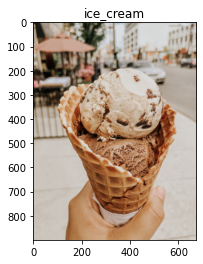

In [20]:
prediction_confindence(model_4,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_4,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_4,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

In [31]:
model_4.save('saved_models/cnn_4')

INFO:tensorflow:Assets written to: saved_models/cnn_4\assets


We heve an imprevemt or pure luck ... one od the images is predicted correctly with just 1.43 % conficence we are still very far from our goal.

### 5.5 CNN-5 model

we will do the same model with a DropOut layer beffor the Flatten lets see if that helps with validation dataset.

In [14]:
model_5 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg, bias_regularizer = reg)
])

model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      1

We will start again with 5 epchs and see if it is wise to continue.

In [15]:
epochs = 5
model_5.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [16]:
history = model_5.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_5")])

Epoch 1/5
2841/2841 [==============================] - 875s 307ms/step - loss: 6.4957 - accuracy: 0.0494 - val_loss: 4.7180 - val_accuracy: 0.0427 - loss: 6.4987 - accu
Epoch 2/5
2841/2841 [==============================] - 726s 255ms/step - loss: 4.6105 - accuracy: 0.0686 - val_loss: 4.5850 - val_accuracy: 0.0827
Epoch 3/5
2841/2841 [==============================] - 716s 252ms/step - loss: 4.3618 - accuracy: 0.1215 - val_loss: 4.4720 - val_accuracy: 0.1166
Epoch 4/5
2841/2841 [==============================] - 788s 277ms/step - loss: 4.2255 - accuracy: 0.1497 - val_loss: 4.0392 - val_accuracy: 0.1906
Epoch 5/5
2841/2841 [==============================] - 845s 297ms/step - loss: 3.8829 - accuracy: 0.2165 - val_loss: 4.0711 - val_accuracy: 0.1982


Well the training accuracy is slyghtly better than validation so we will make more training we will train for 20 epochs.

In [18]:
epochs = 20
history = model_5.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_5")])

Epoch 1/20
2841/2841 [==============================] - 794s 279ms/step - loss: 3.5429 - accuracy: 0.2944 - val_loss: 4.0991 - val_accuracy: 0.2076
Epoch 2/20
2841/2841 [==============================] - 775s 272ms/step - loss: 3.1299 - accuracy: 0.3894 - val_loss: 4.1824 - val_accuracy: 0.2088
Epoch 3/20
2841/2841 [==============================] - 808s 284ms/step - loss: 2.6231 - accuracy: 0.5174 - val_loss: 4.4524 - val_accuracy: 0.1972
Epoch 4/20
2841/2841 [==============================] - 841s 295ms/step - loss: 2.1870 - accuracy: 0.6372 - val_loss: 4.7755 - val_accuracy: 0.1773
Epoch 5/20
2841/2841 [==============================] - 875s 308ms/step - loss: 1.7738 - accuracy: 0.7469 - val_loss: 5.0378 - val_accuracy: 0.1674
Epoch 6/20
2841/2841 [==============================] - 959s 337ms/step - loss: 1.5006 - accuracy: 0.8228 - val_loss: 5.2845 - val_accuracy: 0.1565
Epoch 7/20
2841/2841 [==============================] - 1033s 363ms/step - loss: 1.2977 - accuracy: 0.8743 - val

TypeError: unsupported operand type(s) for +=: 'History' and 'History'

We have an error on History but lucky  for us our traing information is still here first thing we will save our model.

In [23]:
model_5.save('saved_models/cnn_5')

INFO:tensorflow:Assets written to: saved_models/cnn_5\assets


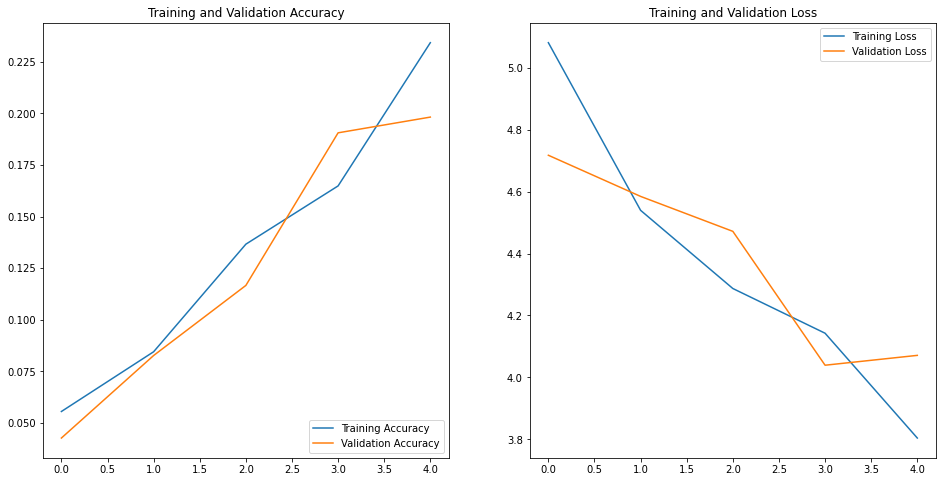

In [22]:
display_history(history,5)

#### Resulst CNN-5 loss: 0.6045 - accuracy: 0.9785 - val_loss: 5.3258 - val_accuracy: 0.1444

Traing about 9h our try for regularization was not enough so we will try make some more on our next model.

### 5.6 CNN-6

Regularizers in the Keras API
If we take a look at the Keras docs, we get a sense of how regularization works in Keras. First of all, “the penalties are applied on a per-layer basis” – which means that you can use different regularizers on different layers in your neural network (TensorFlow, 2021).

Secondly, for each layer, regularization can be performed on one (or all) of three areas within the layer (TensorFlow, 2021):

1. The kernel, through kernel_regularizer, which applies regularization to the kernel a.k.a. the actual weights;
2. The bias value, through bias_regularizer, which applies regularization to the bias, which shifts the layer outputs;
3. The activity value, through activity_regularizer, which applies the regularizer to the output of the layer, i.e. the activation value (which is the combination of the weights + biases with the input vector, fed through the activation function) (Tonutti, 2017).

We will add L1L2 regularization to the Dence layers we start with Elastic Net Regularization, because it combines L1 and L2 and generally performs better because it cancels the disadvantages of the individual regularizers.

In [24]:
model_6 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu", kernel_regularizer = reg_001, bias_regularizer = reg_001),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_28 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 128, 128, 32)     

We will start with 20 epoachs and see how it goes.

In [25]:
epochs = 20
model_6.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_6.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_6")])

Epoch 1/20
2841/2841 [==============================] - 767s 269ms/step - loss: 17.6880 - accuracy: 0.0292 - val_loss: 11.0650 - val_accuracy: 0.0191
Epoch 2/20
2841/2841 [==============================] - 792s 278ms/step - loss: 10.4032 - accuracy: 0.0405 - val_loss: 10.2772 - val_accuracy: 0.0529
Epoch 3/20
2841/2841 [==============================] - 824s 289ms/step - loss: 10.1851 - accuracy: 0.0733 - val_loss: 10.0531 - val_accuracy: 0.0808
Epoch 4/20
2841/2841 [==============================] - 859s 302ms/step - loss: 10.0824 - accuracy: 0.1035 - val_loss: 10.5510 - val_accuracy: 0.0970
Epoch 5/20
2841/2841 [==============================] - 896s 315ms/step - loss: 10.1548 - accuracy: 0.1309 - val_loss: 10.1795 - val_accuracy: 0.1141
Epoch 6/20
2841/2841 [==============================] - 976s 343ms/step - loss: 10.0854 - accuracy: 0.1506 - val_loss: 10.4978 - val_accuracy: 0.1081
Epoch 7/20
2841/2841 [==============================] - 1035s 364ms/step - loss: 9.9882 - accuracy: 

In [26]:
model_6.save('saved_models/cnn_6')

INFO:tensorflow:Assets written to: saved_models/cnn_6\assets


After 8 hours of traing we get about 22% accuracy on train and 19.5% on validation well lets se if we can get some more and to see how the loss function performs.

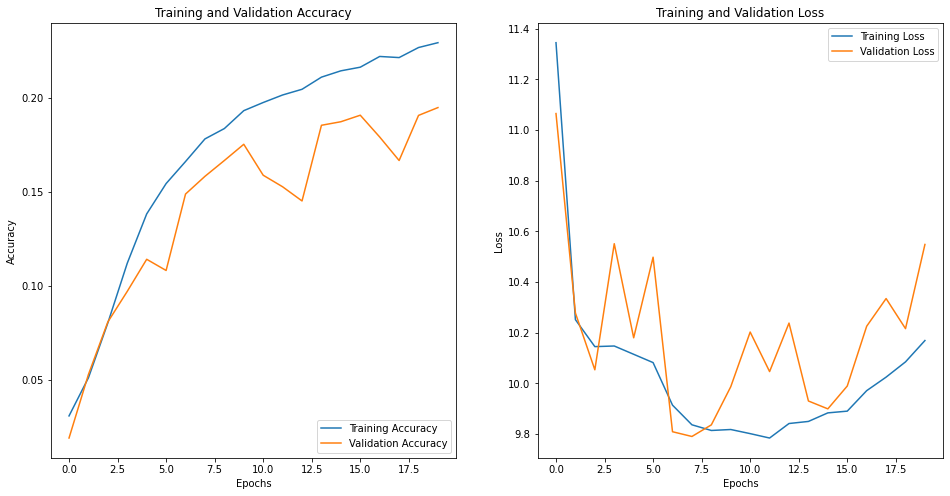

In [31]:
display_history(history,epochs)

In [13]:
loaded_cnn_6_model = tf.keras.models.load_model('saved_models/cnn_6')

In [14]:
loaded_cnn_6_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

We will make 5 more epochs

In [15]:
epochs = 5

In [16]:
history = loaded_cnn_6_model.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_6")])

Epoch 1/5
2841/2841 [==============================] - 628s 219ms/step - loss: 10.3626 - accuracy: 0.2241 - val_loss: 10.3768 - val_accuracy: 0.2075
Epoch 2/5
2841/2841 [==============================] - 622s 219ms/step - loss: 10.2120 - accuracy: 0.2277 - val_loss: 10.6336 - val_accuracy: 0.2204
Epoch 3/5
2841/2841 [==============================] - 654s 230ms/step - loss: 10.3822 - accuracy: 0.2357 - val_loss: 10.6272 - val_accuracy: 0.1851
Epoch 4/5
2841/2841 [==============================] - 685s 241ms/step - loss: 10.4768 - accuracy: 0.2345 - val_loss: 10.7787 - val_accuracy: 0.1691
Epoch 5/5
2841/2841 [==============================] - 737s 259ms/step - loss: 10.5675 - accuracy: 0.2350 - val_loss: 10.8062 - val_accuracy: 0.1924


In [17]:
loaded_cnn_6_model.save('saved_models/cnn_6')

INFO:tensorflow:Assets written to: saved_models/cnn_6\assets


#### Resulst CNN-6 loss: 10.5675 - accuracy: 0.2350 - val_loss: 10.8062 - val_accuracy: 0.1924

Traing about 11h our try for L1L2 regularization was a failure but we will try again with a lower valued of 0.001 of it. And we will remove the Dropourlayer beffor flatten layer so hofuly we will increase the training accuracy.

### 5.7 CNN-7

In [35]:
model_7 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(256,activation = "relu", kernel_regularizer = reg_001, bias_regularizer = reg_001),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      1

We will start with only 5 epochs.

In [22]:
epochs = 5
model_7.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_7.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_7")])

Epoch 1/5
2841/2841 [==============================] - 748s 263ms/step - loss: 13.2350 - accuracy: 0.0260 - val_loss: 7.2773 - val_accuracy: 0.0323
Epoch 2/5
2841/2841 [==============================] - 780s 274ms/step - loss: 7.3636 - accuracy: 0.0511 - val_loss: 7.1258 - val_accuracy: 0.0607
Epoch 3/5
2841/2841 [==============================] - 812s 285ms/step - loss: 6.8793 - accuracy: 0.0913 - val_loss: 6.8388 - val_accuracy: 0.0857
Epoch 4/5
2841/2841 [==============================] - 846s 297ms/step - loss: 6.5271 - accuracy: 0.1351 - val_loss: 6.5694 - val_accuracy: 0.1283
Epoch 5/5
2841/2841 [==============================] - 881s 310ms/step - loss: 6.3256 - accuracy: 0.1766 - val_loss: 7.2300 - val_accuracy: 0.1030


Well result are bad acc of 17% for 2h of traing and loss of over 6 we will reuturn our dropout layer and set regulraization to the last layer with values of 0.01.

In [23]:
model_7 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_18 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_20 (Batc (None, 128, 128, 32)     

We will train for 5 epochs.

In [24]:
epochs = 5
model_7.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_7.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_7")])

Epoch 1/5
2841/2841 [==============================] - 1150s 404ms/step - loss: 6.8119 - accuracy: 0.0628 - val_loss: 4.5225 - val_accuracy: 0.1408
Epoch 2/5
2841/2841 [==============================] - 1166s 410ms/step - loss: 4.4292 - accuracy: 0.1673 - val_loss: 4.1488 - val_accuracy: 0.2449
Epoch 3/5
2841/2841 [==============================] - 1240s 436ms/step - loss: 3.8882 - accuracy: 0.2857 - val_loss: 3.7518 - val_accuracy: 0.3378
Epoch 4/5
2841/2841 [==============================] - 1286s 452ms/step - loss: 3.3933 - accuracy: 0.3982 - val_loss: 4.1864 - val_accuracy: 0.2954
Epoch 5/5
2841/2841 [==============================] - 1317s 463ms/step - loss: 3.1065 - accuracy: 0.4703 - val_loss: 3.7687 - val_accuracy: 0.3640


This model looks promising. Lets save it and continue for 10 more epochs.

In [25]:
model_7.save('saved_models/cnn_7')

INFO:tensorflow:Assets written to: saved_models/cnn_7\assets


In [26]:
epochs = 10
history_2 = model_7.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_7")])

Epoch 1/10
2841/2841 [==============================] - 1332s 468ms/step - loss: 2.7640 - accuracy: 0.5500 - val_loss: 3.8259 - val_accuracy: 0.3604
Epoch 2/10
2841/2841 [==============================] - 1340s 471ms/step - loss: 2.6218 - accuracy: 0.5866 - val_loss: 3.7719 - val_accuracy: 0.3799
Epoch 3/10
2841/2841 [==============================] - 1436s 505ms/step - loss: 2.4056 - accuracy: 0.6382 - val_loss: 3.8618 - val_accuracy: 0.3725
Epoch 4/10
2841/2841 [==============================] - 1487s 523ms/step - loss: 2.3493 - accuracy: 0.6537 - val_loss: 3.9913 - val_accuracy: 0.3669
Epoch 5/10
2841/2841 [==============================] - 1540s 541ms/step - loss: 2.2030 - accuracy: 0.6856 - val_loss: 4.4923 - val_accuracy: 0.2764
Epoch 6/10
2841/2841 [==============================] - 1666s 585ms/step - loss: 2.1340 - accuracy: 0.7020 - val_loss: 4.1766 - val_accuracy: 0.3416
Epoch 7/10
2841/2841 [==============================] - 1850s 650ms/step - loss: 2.0709 - accuracy: 0.7153

#### Resulst CNN-7 loss: 1.9146 - accuracy: 0.7522 - val_loss: 4.2967 - val_accuracy: 0.3460

Traing about 9h our try for regularization was not enough so we will try make some more on our next model.

In [27]:
model_7.save('saved_models/cnn_7')

INFO:tensorflow:Assets written to: saved_models/cnn_7\assets


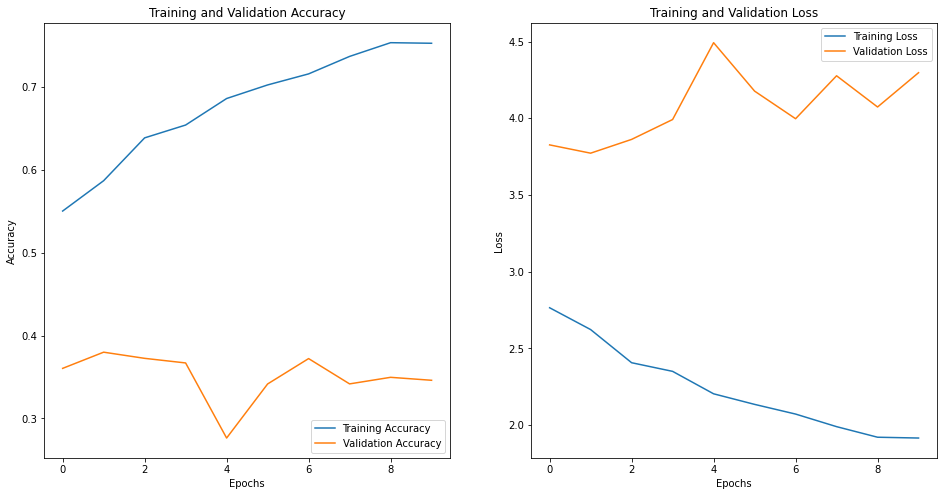

In [38]:
display_history(history_2,epochs)

It started to have realy hight variance at 6th epoch and this is not what we want but just for information lets make some predictions.

This image most likely belongs to tiramisu with a 1.1299876496195793 percent confidence.


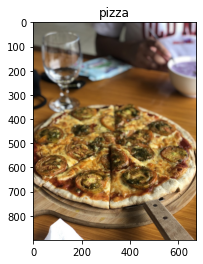

This image most likely belongs to chocolate_cake with a 1.247931830585003 percent confidence.


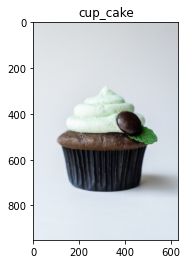

This image most likely belongs to ice_cream with a 2.3032328113913536 percent confidence.


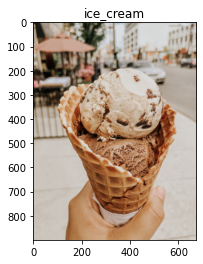

In [35]:
prediction_confindence(model_7,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_7,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_7,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

Well 1/3 again but our ice_cream got from 1.43 to 2.30% precent realy bad bur for us it is some improvement.

### 5.8 CNN-8

In our 8th model we will add DropOut between the Dencelayers and one more Conv2D layer with 512 filters, to add more regularization and hopefuly improve validation results.

In [20]:
model_8 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_31 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_33 (Batc (None, 128, 128, 32)     

We will go ahead with 15 epochs and see how is doing at the end.

In [21]:
epochs = 15
model_8.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_8.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_8")])

Epoch 1/15
2841/2841 [==============================] - 881s 308ms/step - loss: 6.7948 - accuracy: 0.0591 - val_loss: 4.5990 - val_accuracy: 0.1309
Epoch 2/15
2841/2841 [==============================] - 797s 280ms/step - loss: 4.4991 - accuracy: 0.1534 - val_loss: 4.0728 - val_accuracy: 0.2625
Epoch 3/15
2841/2841 [==============================] - 686s 241ms/step - loss: 4.0427 - accuracy: 0.2569 - val_loss: 5.0297 - val_accuracy: 0.1221
Epoch 4/15
2841/2841 [==============================] - 680s 239ms/step - loss: 3.7128 - accuracy: 0.3354 - val_loss: 3.6522 - val_accuracy: 0.3635
Epoch 5/15
2841/2841 [==============================] - 703s 247ms/step - loss: 3.5098 - accuracy: 0.3807 - val_loss: 3.7881 - val_accuracy: 0.3542
Epoch 6/15
2841/2841 [==============================] - 730s 257ms/step - loss: 3.2636 - accuracy: 0.4402 - val_loss: 3.4807 - val_accuracy: 0.4102
Epoch 7/15
2841/2841 [==============================] - 759s 267ms/step - loss: 3.0629 - accuracy: 0.4883 - val_

In [22]:
model_8.save('saved_models/cnn_8')

INFO:tensorflow:Assets written to: saved_models/cnn_8\assets


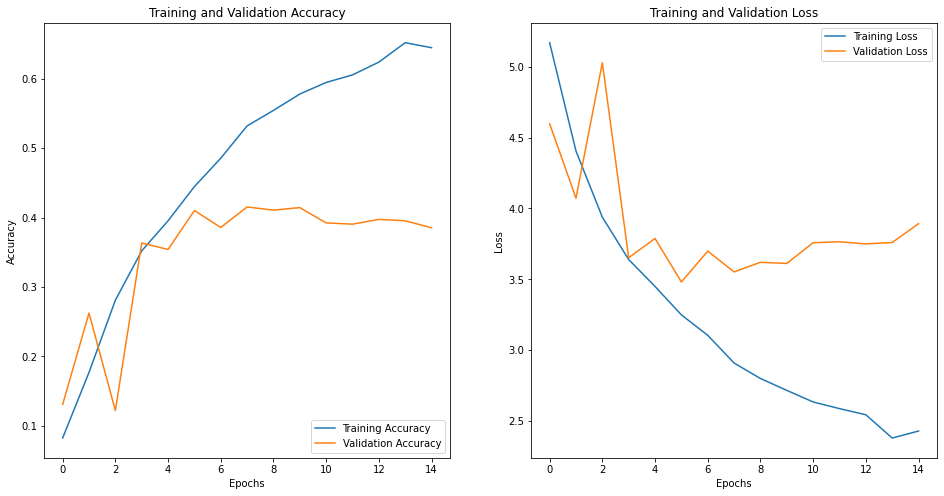

In [23]:
display_history(history,epochs)

#### Resulst CNN-8 loss: 2.3281 - accuracy: 0.6623 - val_loss: 3.8929 - val_accuracy: 0.3853

Traing about 8h we have a little less accuracy but our validation rizes well not what we hoped for but we will try mto make it better for our next model.

### 5.9 CNN-9

Here we will just add after the flatten layer one more Dence layer fallowed by a Droput layer iwth value of 0.1

In [15]:
model_9 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(256,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_9.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_13 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 32)      1

We will Train for 15 epochs

In [16]:
epochs = 15
model_9.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_9.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_9")])

Epoch 1/15
2841/2841 [==============================] - 867s 303ms/step - loss: 6.8225 - accuracy: 0.0444 - val_loss: 4.7263 - val_accuracy: 0.0937
Epoch 2/15
2841/2841 [==============================] - 583s 205ms/step - loss: 4.5684 - accuracy: 0.1254 - val_loss: 4.1951 - val_accuracy: 0.2150
Epoch 3/15
2841/2841 [==============================] - 606s 213ms/step - loss: 4.0925 - accuracy: 0.2318 - val_loss: 3.7587 - val_accuracy: 0.3209
Epoch 4/15
2841/2841 [==============================] - 640s 225ms/step - loss: 3.6848 - accuracy: 0.3240 - val_loss: 3.4933 - val_accuracy: 0.3773
Epoch 5/15
2841/2841 [==============================] - 712s 250ms/step - loss: 3.3947 - accuracy: 0.3917 - val_loss: 3.2923 - val_accuracy: 0.4308
Epoch 6/15
2841/2841 [==============================] - 740s 260ms/step - loss: 3.1564 - accuracy: 0.4475 - val_loss: 3.2852 - val_accuracy: 0.4378
Epoch 7/15
2841/2841 [==============================] - 772s 271ms/step - loss: 2.9442 - accuracy: 0.4986 - val_

In [17]:
model_9.save('saved_models/cnn_9')

INFO:tensorflow:Assets written to: saved_models/cnn_9\assets


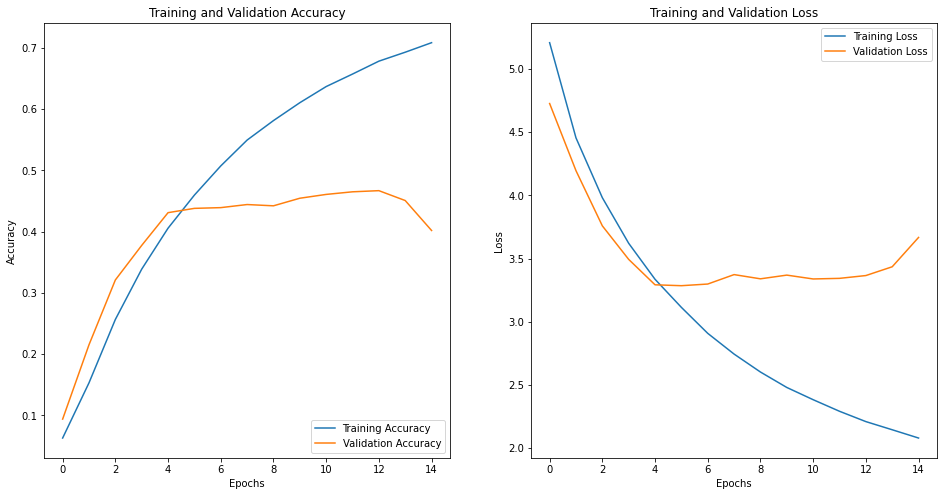

In [21]:
display_history(history,epochs)

#### Resulst CNN-9 loss: 2.0950 - accuracy: 0.7050 - val_loss: 3.6670 - val_accuracy: 0.4017

Traing about 6h we have better resuls loss is down acc is up some goes for val loss and val accuracy.

But our problem percists with validation goes realy wron at about 40% accuracy but letsmake some predictions again to see how we do.

This image most likely belongs to pizza with a 1.5016166493296623 percent confidence.


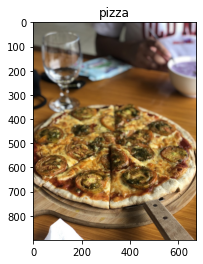

This image most likely belongs to cup_cakes with a 1.1227359995245934 percent confidence.


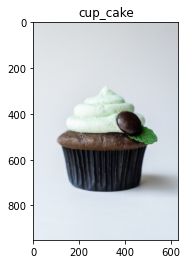

This image most likely belongs to ice_cream with a 2.1051419898867607 percent confidence.


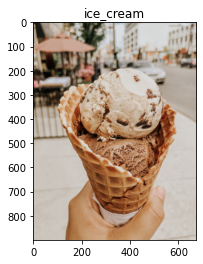

In [22]:
prediction_confindence(model_9,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_9,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_9,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

We have 3 of 3 100% ... well not so fast we are corect sure for 3 images but the confidence is still realy low in 1 2 percentile we wneed to make some changes this prediction on 3 images will NOT work.

## 6. Adding Test Dataset

So our data now is just training and validation dataset and we are testing with just images and with predictions with 2 3 percent our results will not be accurate so now we will take all images.

In [21]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIR,
  seed=123,
  image_size=(IMAGE_HEIGH, IMAGE_WIDTH),
  batch_size=batch_size)

Found 101000 files belonging to 101 classes.


We have our images 101000 to 101 classes.

In [22]:
num_classes = len(ds.class_names)
class_names = ds.class_names

In [23]:
DATASET_SIZE= len(ds.file_paths)

In [24]:
DATASET_SIZE

101000

Now we nned to split the dataset to one for train one for validation and one for testing. We will use 80% of the data for training and 10% fo validation and testing.

In [25]:
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.1 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

In [26]:
print(train_size / batch_size)
print(val_size  / batch_size)
print(test_size / batch_size)

2525.0
315.625
315.625


So the data in not evenly split so we will just take 300 batches for test and validation other will go to training (2557).

In [27]:
train_ds = ds.take(2557)
test_ds = ds.skip(2557)
val_ds = test_ds.skip(300)
test_ds = test_ds.take(300)

In [28]:
len(train_ds)

2557

In [29]:
len(test_ds)

300

In [30]:
len(val_ds)

300

Our datasets are done and with the right lenght. before we start again on training lets plot some images to see if they are still in the dataset.

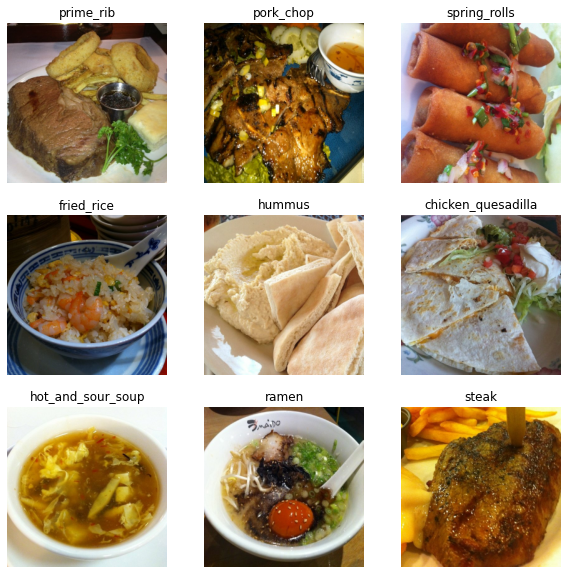

In [31]:
plot_images(train_ds)

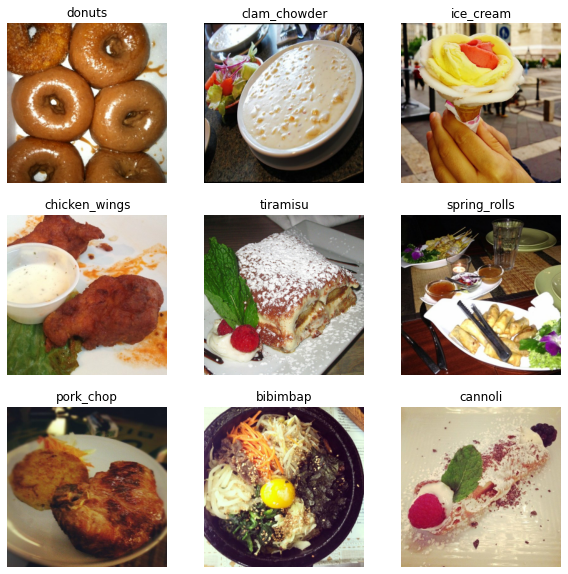

In [32]:
plot_images(val_ds)

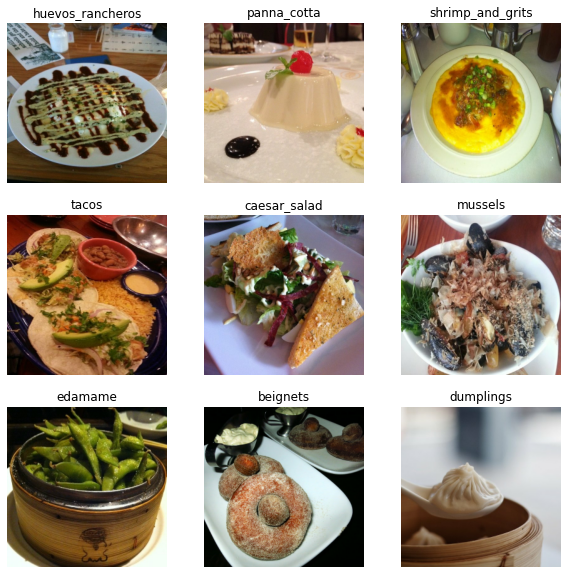

In [33]:
plot_images(test_ds)

Ok images and classes seams ok we are set to train.

## 7 Continue with Convolutional neural network model

### 7.1 CNN-10

Here we will just add after the preprocessing.Random Flip, preprocessing.RandomRotation and preprocessing.Random Zoom to increase our dataset with images, of cource with the same image, but from different perspectives.

In [47]:
model_10 = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(256,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_3 (RandomFlip)   (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_3 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_3 (RandomZoom)   (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_39 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 128, 128, 16)      0

We will start with 5 epochs

In [49]:
epochs = 5
model_10.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_10.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_10")])

Epoch 1/5
2557/2557 [==============================] - 996s 388ms/step - loss: 6.9929 - accuracy: 0.0433 - val_loss: 4.7389 - val_accuracy: 0.0761
Epoch 2/5
2557/2557 [==============================] - 954s 373ms/step - loss: 4.6467 - accuracy: 0.1031 - val_loss: 4.4525 - val_accuracy: 0.1693
Epoch 3/5
2557/2557 [==============================] - 1022s 399ms/step - loss: 4.2986 - accuracy: 0.1862 - val_loss: 4.0219 - val_accuracy: 0.2578
Epoch 4/5
2557/2557 [==============================] - 1076s 421ms/step - loss: 3.9603 - accuracy: 0.2610 - val_loss: 4.0600 - val_accuracy: 0.2665
Epoch 5/5
2557/2557 [==============================] - 1165s 455ms/step - loss: 3.7004 - accuracy: 0.3207 - val_loss: 3.6700 - val_accuracy: 0.3367


In [50]:
model_10.save('saved_models/cnn_10')

INFO:tensorflow:Assets written to: saved_models/cnn_10\assets


This model looks promesing lets continue with 10 more epochs.

In [52]:
epochs = 10

In [53]:
history_2 = model_10.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_10")])

Epoch 1/10
2557/2557 [==============================] - 1223s 478ms/step - loss: 3.4986 - accuracy: 0.3688 - val_loss: 3.6151 - val_accuracy: 0.3660
Epoch 2/10
2557/2557 [==============================] - 1235s 482ms/step - loss: 3.3702 - accuracy: 0.4022 - val_loss: 3.2754 - val_accuracy: 0.4347
Epoch 3/10
2557/2557 [==============================] - 1301s 508ms/step - loss: 3.2731 - accuracy: 0.4266 - val_loss: 3.2667 - val_accuracy: 0.4428
Epoch 4/10
2557/2557 [==============================] - 1392s 544ms/step - loss: 3.1972 - accuracy: 0.4450 - val_loss: 3.3170 - val_accuracy: 0.4334
Epoch 5/10
2557/2557 [==============================] - 1470s 574ms/step - loss: 3.1273 - accuracy: 0.4640 - val_loss: 3.4489 - val_accuracy: 0.4118
Epoch 6/10
2557/2557 [==============================] - 1653s 646ms/step - loss: 3.0713 - accuracy: 0.4780 - val_loss: 3.0641 - val_accuracy: 0.4841
Epoch 7/10
2557/2557 [==============================] - 1783s 697ms/step - loss: 3.0252 - accuracy: 0.4894

In [54]:
model_10.save('saved_models/cnn_10')

INFO:tensorflow:Assets written to: saved_models/cnn_10\assets


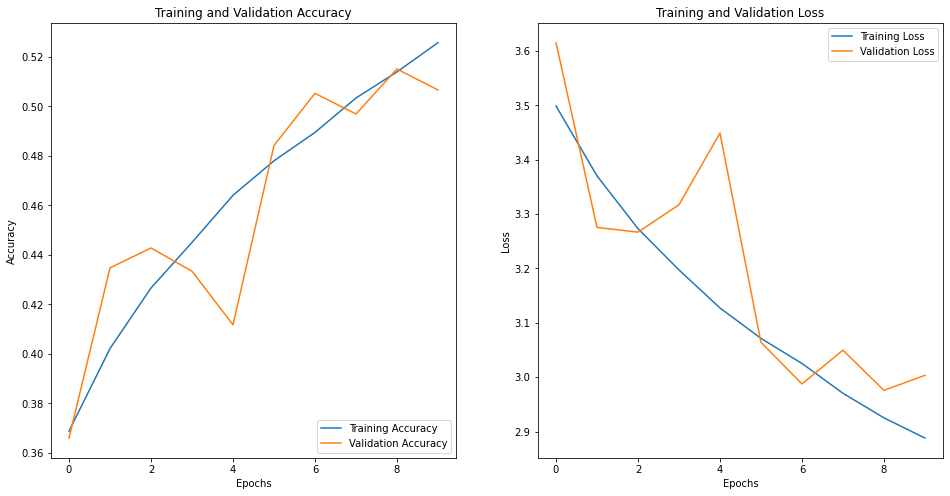

In [57]:
display_history(history_2,epochs)

#### Resulst CNN-10 loss: 2.8881 - accuracy: 0.5257 - val_loss: 3.0034 - val_accuracy: 0.5066

Traing about 6h we have a lot better results for the first time Accuracy for training and vaidation is over 50%.

Lets me some predictions.

This image most likely belongs to takoyaki with a 1.2396031059324741 percent confidence.


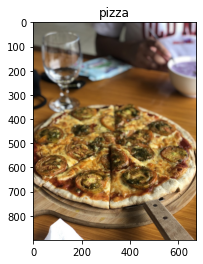

This image most likely belongs to macarons with a 1.4499378390610218 percent confidence.


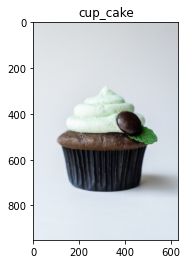

This image most likely belongs to ice_cream with a 1.4393306337296963 percent confidence.


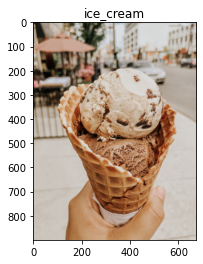

In [60]:
prediction_confindence(model_10,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_10,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_10,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

We are realy bad on our confidence but our accuracy on those 3 images is pook too 1/3 so it is better to evaluete the model with the test dataset but we will wait a bit to try make more models and then test on the best one.

### 7.2 CNN-11

We need to top shooting at the dark and see some references about model architecture from good models for image classification in our Case we will chose **VGG19**

![alt text](vgg-19.png)

Se we see that for ecery MaxPool layer we have at least 2 Conv2D layers we will od the same and with that lowr our regularization from our last try on CNN-9 form 0.2 to 0.1 on the and we will put 3 of those layers beffor Flattem and adter 1st and secnond Dence Layers.

In [23]:
model_11 = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPool2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(512,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu"),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = reg_01, bias_regularizer = reg_01)
])

model_11.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 64)     

We have Trainable params: 21,857,573 with our training speed this will take a while but lests hope our model now will get better performance. we will start with 5 epochs.

In [31]:
epochs = 5
model_11.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_11.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_11")])

Epoch 1/5
2557/2557 [==============================] - 2862s 1s/step - loss: 3.8455 - accuracy: 0.3034 - val_loss: 3.7784 - val_accuracy: 0.3355
Epoch 2/5
2557/2557 [==============================] - 3026s 1s/step - loss: 3.7262 - accuracy: 0.3314 - val_loss: 3.5460 - val_accuracy: 0.3820
Epoch 3/5
2557/2557 [==============================] - 3241s 1s/step - loss: 3.5983 - accuracy: 0.3592 - val_loss: 3.4430 - val_accuracy: 0.4086
Epoch 4/5
2557/2557 [==============================] - 3783s 1s/step - loss: 3.4759 - accuracy: 0.3888 - val_loss: 3.5888 - val_accuracy: 0.3907
Epoch 5/5
2557/2557 [==============================] - 3879s 2s/step - loss: 3.4749 - accuracy: 0.3935 - val_loss: 3.3885 - val_accuracy: 0.4260


In [32]:
model_11.save('saved_models/cnn_11')

INFO:tensorflow:Assets written to: saved_models/cnn_11\assets


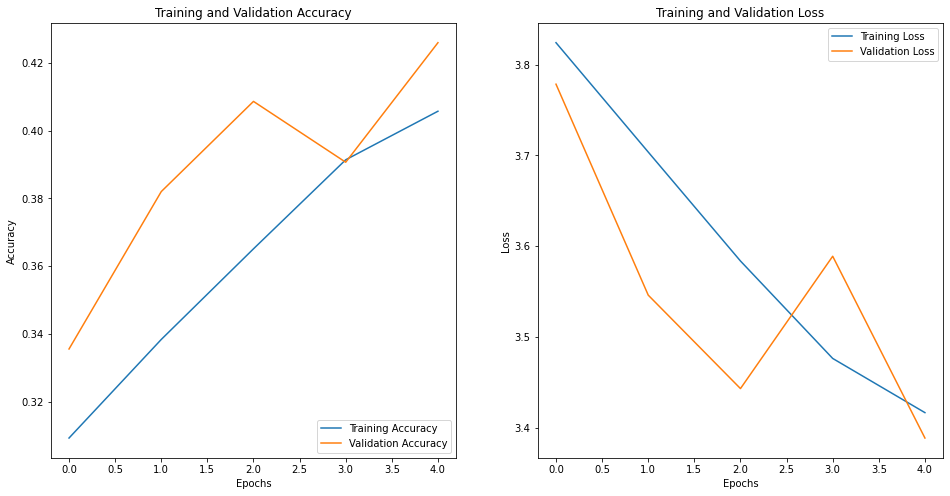

In [33]:
display_history(history,epochs)

#### Resulst CNN-11 loss: 3.4749 - accuracy: 0.3935 - val_loss: 3.3885 - val_accuracy: 0.4260

Result are not so bad but the training time is huge we can not afford to have those numbers of 1 and more second for step.

WE need to make some changes.

### 7.3 CNN-12

Here we will try to start with removing Random flip, rotation and zoom and and we will let just one Conv2D layer between MaxPool layer nad hight number of filters even from the begining so hopefuly the model will do better on training time, and we will remove the Dropout layers to see if it can go again over 90% with more filters in convolution layers.

In [22]:
model_12 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu", ),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu", ),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", )
])

model_12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)     

We will start 5 epochs

In [23]:
epochs = 5
model_12.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_12.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_12")])

Epoch 1/5
2557/2557 [==============================] - 1525s 594ms/step - loss: 4.2705 - accuracy: 0.0808 - val_loss: 3.9000 - val_accuracy: 0.1711
Epoch 2/5
2557/2557 [==============================] - 1537s 601ms/step - loss: 3.1480 - accuracy: 0.2410 - val_loss: 3.1032 - val_accuracy: 0.2758
Epoch 3/5
2557/2557 [==============================] - 1606s 628ms/step - loss: 2.4011 - accuracy: 0.3933 - val_loss: 2.5935 - val_accuracy: 0.3829
Epoch 4/5
2557/2557 [==============================] - 1676s 655ms/step - loss: 1.7883 - accuracy: 0.5283 - val_loss: 2.9500 - val_accuracy: 0.3676
Epoch 5/5
2557/2557 [==============================] - 1746s 682ms/step - loss: 1.2579 - accuracy: 0.6546 - val_loss: 3.2296 - val_accuracy: 0.3681


In [26]:
model_12.save('saved_models/cnn_12')

INFO:tensorflow:Assets written to: saved_models/cnn_12\assets


#### Resulst CNN-12 loss: 1.2579 - accuracy: 0.6546 - val_loss: 3.2296 - val_accuracy: 0.3681

Time for training got 2 times better but result are worse.

### 7.4 CNN-13

in our 13th atempth we will return kernel_regularizer and bias_regularizer to 1st and 2nd Dence layer and we will put again some Dropout Before Flaten and again after 1st and 2nd Dence layer with value of 0.1, tuning to better generalization and expecting better accuracy fron the validation dataset.

In [24]:
model_13 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu", kernel_regularizer = reg_01, bias_regularizer = reg_01),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(512,activation = "relu", kernel_regularizer = reg_01, bias_regularizer = reg_01),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(num_classes,activation = "softmax", )
])

model_13.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)     

In [25]:
epochs = 5
model_13.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_13.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_13")])

Epoch 1/5
2557/2557 [==============================] - 1845s 721ms/step - loss: 4.3559 - accuracy: 0.0745 - val_loss: 3.5402 - val_accuracy: 0.1860
Epoch 2/5
2557/2557 [==============================] - 1829s 715ms/step - loss: 3.2475 - accuracy: 0.2237 - val_loss: 3.5545 - val_accuracy: 0.2150
Epoch 3/5
2557/2557 [==============================] - 1886s 737ms/step - loss: 2.5859 - accuracy: 0.3562 - val_loss: 2.6652 - val_accuracy: 0.3646
Epoch 4/5
2557/2557 [==============================] - 2055s 803ms/step - loss: 2.0694 - accuracy: 0.4677 - val_loss: 2.5956 - val_accuracy: 0.3898
Epoch 5/5
2557/2557 [==============================] - 2276s 889ms/step - loss: 1.6609 - accuracy: 0.5580 - val_loss: 3.0314 - val_accuracy: 0.3368


In [27]:
model_13.save('saved_models/cnn_13')

INFO:tensorflow:Assets written to: saved_models/cnn_13\assets


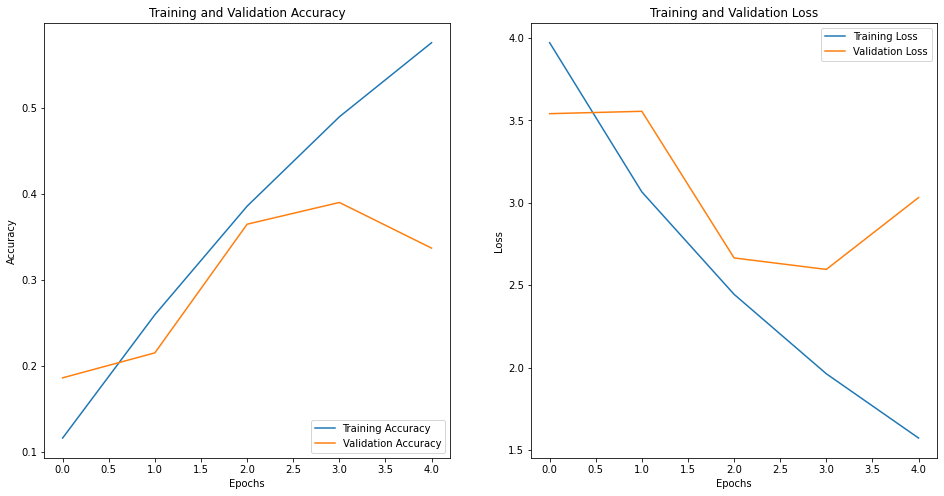

In [30]:
display_history(history,epochs)

#### Resulst CNN-13 loss: 1.6609 - accuracy: 0.5580 - val_loss: 3.0314 - val_accuracy: 0.3368

Time for training is Ok bur reulst are not val_accuracy: 0.3368 is too low

### 7.5 CNN-14

Well obvously prepocesing with RandomFlip, RandomRotation, RandomZoom is needed we will return 2 Conv2D before each MaxPool2D and we will put Dropout with value of 0.2 after the 1st and 2nd Dence layer, hopefuly the model does better on validation.

In [17]:
model_14 = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu", kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu",  kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01))
])

model_14.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_2 (RandomFlip)   (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 256, 256, 32)     

In [18]:
epochs = 8
model_14.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_14.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_14")])

Epoch 1/8
2557/2557 [==============================] - 1209s 470ms/step - loss: 10.1019 - accuracy: 0.0362 - val_loss: 5.9484 - val_accuracy: 0.0390
Epoch 2/8
2557/2557 [==============================] - 1228s 480ms/step - loss: 5.5158 - accuracy: 0.0667 - val_loss: 5.4997 - val_accuracy: 0.0855
Epoch 3/8
2557/2557 [==============================] - 1705s 667ms/step - loss: 5.6322 - accuracy: 0.0882 - val_loss: 5.5506 - val_accuracy: 0.1006
Epoch 4/8
2557/2557 [==============================] - 1598s 625ms/step - loss: 5.6472 - accuracy: 0.1105 - val_loss: 5.7248 - val_accuracy: 0.1221
Epoch 5/8
2557/2557 [==============================] - 1736s 679ms/step - loss: 5.6976 - accuracy: 0.1357 - val_loss: 5.7182 - val_accuracy: 0.1539
Epoch 6/8
2557/2557 [==============================] - 1903s 744ms/step - loss: 5.6181 - accuracy: 0.1681 - val_loss: 5.4966 - val_accuracy: 0.1709
Epoch 7/8
2557/2557 [==============================] - 2117s 828ms/step - loss: 5.2960 - accuracy: 0.1937 - val

In [19]:
model_14.save('saved_models/cnn_14')

INFO:tensorflow:Assets written to: saved_models/cnn_14\assets


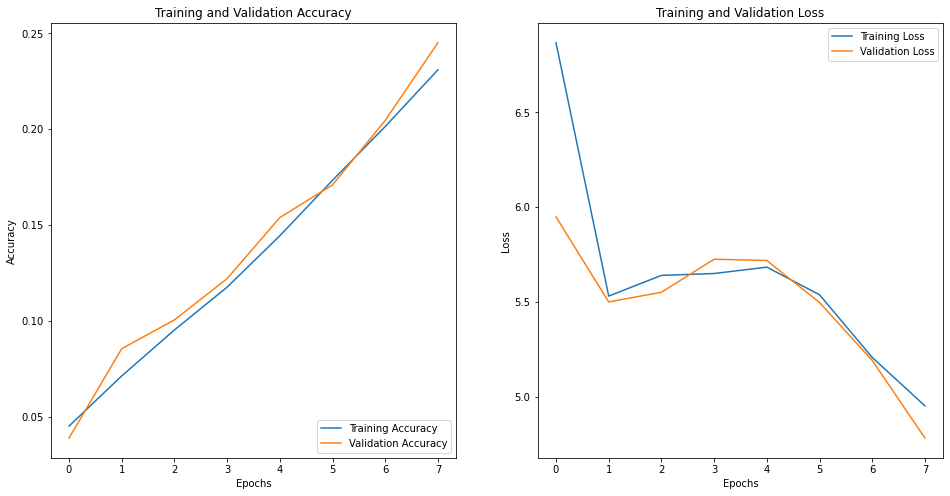

In [21]:
display_history(history,epochs)

Well time for training is in the limits and we got good direction of training and validation we will continue with 6 more epochs

In [22]:
epochs = 6

In [23]:
history = model_14.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_14")])

Epoch 1/6
2557/2557 [==============================] - 2379s 930ms/step - loss: 4.7085 - accuracy: 0.2634 - val_loss: 4.5806 - val_accuracy: 0.2716
Epoch 2/6
2557/2557 [==============================] - 2537s 991ms/step - loss: 4.5216 - accuracy: 0.2886 - val_loss: 4.4754 - val_accuracy: 0.2891
Epoch 3/6
2557/2557 [==============================] - 2745s 1s/step - loss: 4.3753 - accuracy: 0.3111 - val_loss: 4.2465 - val_accuracy: 0.3349
Epoch 4/6
2557/2557 [==============================] - 2864s 1s/step - loss: 4.2320 - accuracy: 0.3325 - val_loss: 4.1162 - val_accuracy: 0.3387
Epoch 5/6
2557/2557 [==============================] - 3028s 1s/step - loss: 4.1247 - accuracy: 0.3483 - val_loss: 3.9652 - val_accuracy: 0.3839
Epoch 6/6
2557/2557 [==============================] - 3162s 1s/step - loss: 3.9987 - accuracy: 0.3638 - val_loss: 3.9134 - val_accuracy: 0.3747


In [24]:
model_14.save('saved_models/cnn_14')

INFO:tensorflow:Assets written to: saved_models/cnn_14\assets


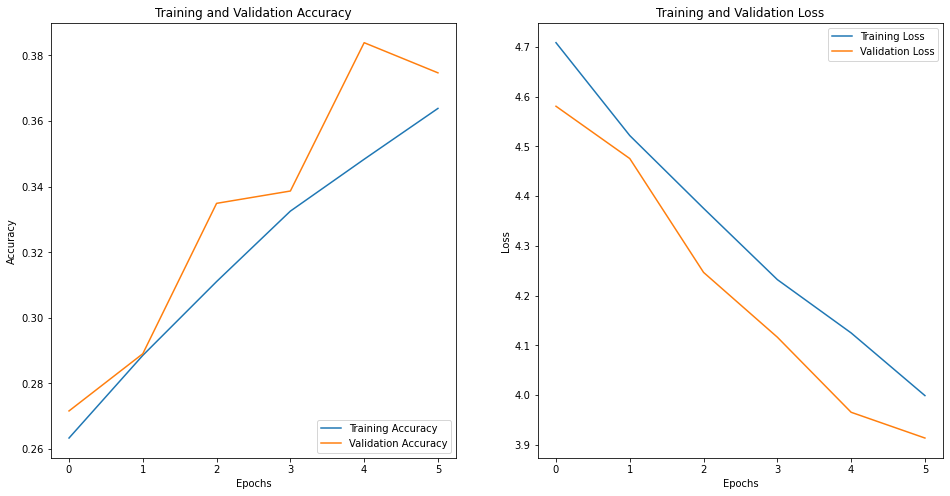

In [25]:
display_history(history,epochs)

After 14 epoch loss: 3.9987 - accuracy: 0.3638 - val_loss: 3.9134 - val_accuracy: 0.3747 model stays ok we continue. Of cource we have saved the model first.

In [15]:
model_14 = tf.keras.models.load_model('saved_models/cnn_14')

In [16]:
epochs = 12
model_14.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_14.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_14")])

Epoch 1/12
2557/2557 [==============================] - 1754s 681ms/step - loss: 3.9611 - accuracy: 0.3730 - val_loss: 3.8987 - val_accuracy: 0.3840
Epoch 2/12
2557/2557 [==============================] - 1516s 593ms/step - loss: 3.8735 - accuracy: 0.3856 - val_loss: 3.6393 - val_accuracy: 0.4239
Epoch 3/12
2557/2557 [==============================] - 1581s 618ms/step - loss: 3.7278 - accuracy: 0.3980 - val_loss: 3.7719 - val_accuracy: 0.3846
Epoch 4/12
2557/2557 [==============================] - 1662s 650ms/step - loss: 3.6781 - accuracy: 0.4065 - val_loss: 3.5105 - val_accuracy: 0.4215
Epoch 5/12
2557/2557 [==============================] - 1799s 703ms/step - loss: 3.5961 - accuracy: 0.4180 - val_loss: 3.7341 - val_accuracy: 0.4091
Epoch 6/12
2557/2557 [==============================] - 2028s 793ms/step - loss: 3.5743 - accuracy: 0.4218 - val_loss: 3.6113 - val_accuracy: 0.4164
Epoch 7/12
2557/2557 [==============================] - 2161s 845ms/step - loss: 3.5405 - accuracy: 0.4303

In [17]:
model_14.save('saved_models/cnn_14')

INFO:tensorflow:Assets written to: saved_models/cnn_14\assets


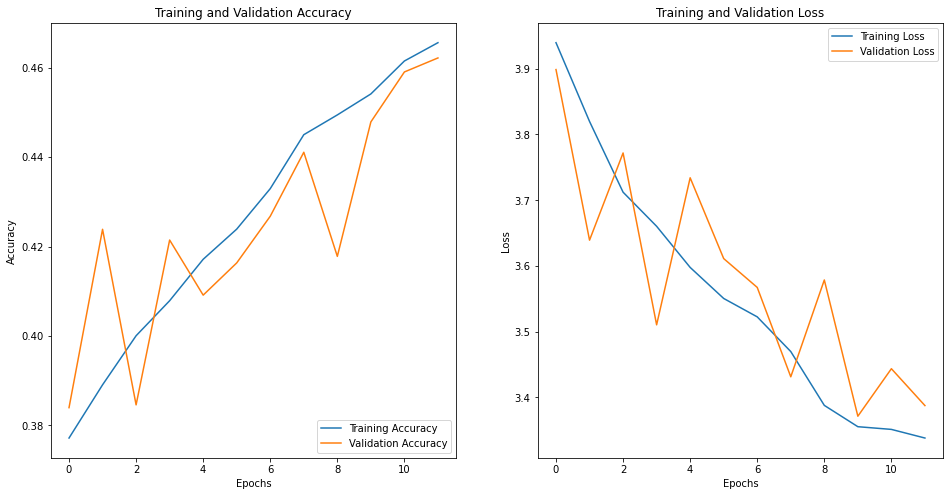

In [20]:
display_history(history,epochs)

#### Resulst CNN-14 loss: 3.3531 - accuracy: 0.4641 - val_loss: 3.3877 - val_accuracy: 0.4622

After 26 epochs and 16 hours we have got to accuracy of 46% and validation of 46% this is too low and time consuming we need some changes for faster and better performance.

### 7.6 CNN-15

on CNN-15 we will add one more Conv2D with 512 filter and more importatly one MaxPool2D layer beffor Flatten to try reduce the parameters fore training 77 000 000 is too much.

In [15]:
model_15 = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu", kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu",  kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01))
])

model_15.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)     

We have got to 21,874,949 Trainable params seam good enough kets try with 10 epoch for training at the start.

In [16]:
epochs = 10
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_15.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_15")])

Epoch 1/10
2557/2557 [==============================] - 1732s 672ms/step - loss: 8.7860 - accuracy: 0.0415 - val_loss: 5.2226 - val_accuracy: 0.0683
Epoch 2/10
2557/2557 [==============================] - 1527s 597ms/step - loss: 5.0173 - accuracy: 0.0792 - val_loss: 5.1003 - val_accuracy: 0.1042
Epoch 3/10
2557/2557 [==============================] - 1633s 638ms/step - loss: 4.9440 - accuracy: 0.1068 - val_loss: 4.9966 - val_accuracy: 0.1136
Epoch 4/10
2557/2557 [==============================] - 1736s 679ms/step - loss: 4.8415 - accuracy: 0.1346 - val_loss: 5.0090 - val_accuracy: 0.1332
Epoch 5/10
2557/2557 [==============================] - 1876s 733ms/step - loss: 4.7114 - accuracy: 0.1611 - val_loss: 4.6246 - val_accuracy: 0.1866
Epoch 6/10
2557/2557 [==============================] - 2002s 783ms/step - loss: 4.6054 - accuracy: 0.1963 - val_loss: 4.5399 - val_accuracy: 0.2082
Epoch 7/10
2557/2557 [==============================] - 2190s 856ms/step - loss: 4.3833 - accuracy: 0.2305

In [17]:
model_15.save('saved_models/cnn_15')

INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


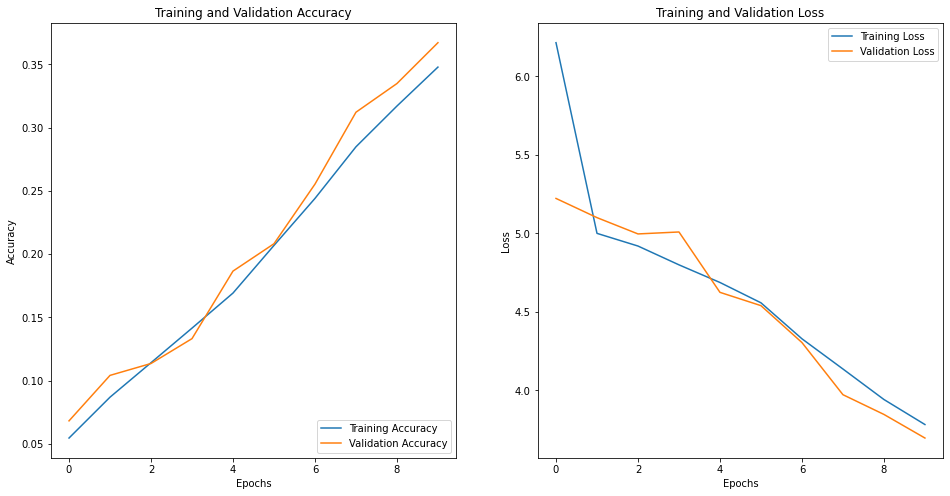

In [20]:
display_history(history,epochs)

WE have a good start for 6h we got to 34% training and validation accuracy we will continue we will save our work and continue with 15 more epochs.

In [17]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

In [18]:
epochs = 15
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_15.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_15")])

Epoch 1/15
2557/2557 [==============================] - 1755s 682ms/step - loss: 3.6930 - accuracy: 0.3665 - val_loss: 3.5770 - val_accuracy: 0.3936
Epoch 2/15
2557/2557 [==============================] - 1503s 588ms/step - loss: 3.5470 - accuracy: 0.3912 - val_loss: 3.4183 - val_accuracy: 0.4141
Epoch 3/15
2557/2557 [==============================] - 1616s 632ms/step - loss: 3.4708 - accuracy: 0.4047 - val_loss: 3.2702 - val_accuracy: 0.4368
Epoch 4/15
2557/2557 [==============================] - 1687s 659ms/step - loss: 3.3595 - accuracy: 0.4215 - val_loss: 3.3570 - val_accuracy: 0.4295
Epoch 5/15
2557/2557 [==============================] - 1792s 700ms/step - loss: 3.2871 - accuracy: 0.4336 - val_loss: 3.2282 - val_accuracy: 0.4475
Epoch 6/15
2557/2557 [==============================] - 1907s 745ms/step - loss: 3.2108 - accuracy: 0.4476 - val_loss: 3.1164 - val_accuracy: 0.4714
Epoch 7/15
2557/2557 [==============================] - 2022s 790ms/step - loss: 3.1389 - accuracy: 0.4626

In [19]:
model_15.save('saved_models/cnn_15')

INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


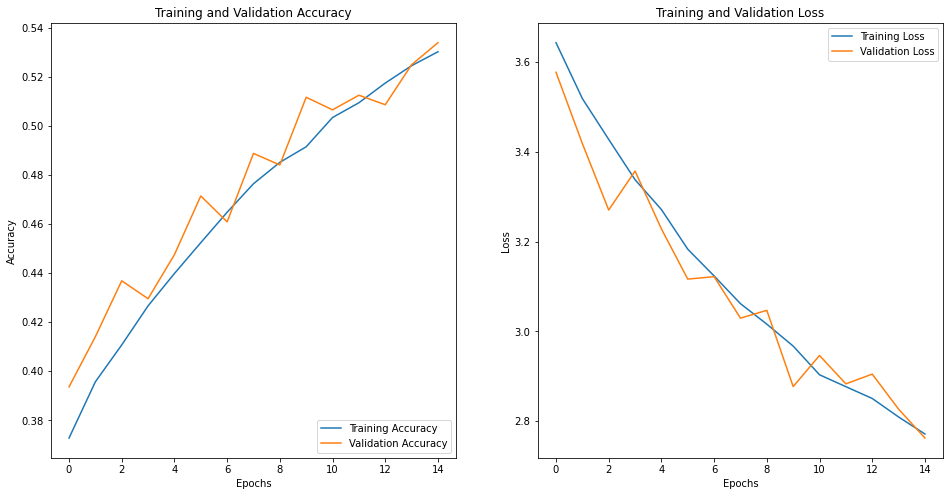

In [20]:
display_history(history,epochs)

Realy good for 11 h of training but this is our best so far so we will continue with 15 more epochs.

In [29]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

In [30]:
epochs = 15
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
history = model_15.fit(train_ds,epochs=epochs, validation_data=val_ds,callbacks=[TensorBoard(log_dir = "logs_cnn_15")])

Epoch 1/15
2557/2557 [==============================] - 1737s 675ms/step - loss: 2.7553 - accuracy: 0.5354 - val_loss: 2.7578 - val_accuracy: 0.5419
Epoch 2/15
2557/2557 [==============================] - 1539s 602ms/step - loss: 2.7146 - accuracy: 0.5385 - val_loss: 2.6993 - val_accuracy: 0.5521
Epoch 3/15
2557/2557 [==============================] - 1597s 624ms/step - loss: 2.6612 - accuracy: 0.5525 - val_loss: 2.6535 - val_accuracy: 0.5594
Epoch 4/15
2557/2557 [==============================] - 1665s 651ms/step - loss: 2.6321 - accuracy: 0.5577 - val_loss: 2.7332 - val_accuracy: 0.5486
Epoch 5/15
2557/2557 [==============================] - 1780s 696ms/step - loss: 2.6159 - accuracy: 0.5610 - val_loss: 2.6524 - val_accuracy: 0.5629
Epoch 6/15
2557/2557 [==============================] - 1896s 741ms/step - loss: 2.5934 - accuracy: 0.5629 - val_loss: 2.6628 - val_accuracy: 0.5626
Epoch 7/15
2557/2557 [==============================] - 2035s 795ms/step - loss: 2.5584 - accuracy: 0.5695

In [31]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

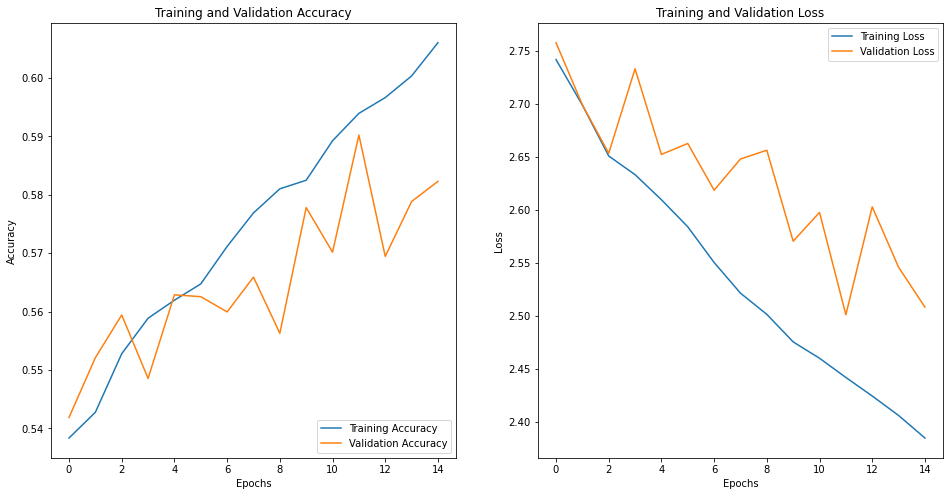

In [33]:
display_history(history,epochs)

**If you notice i did NOT save my work i loaded again prevoiusly saved model and lost 12 h of training**

So for brief moment i was going to trow my PC true the window but after that I concentrated and found a way to impove the training time.

## 8. Impoving Training

### The 4 cells below are added after CNN 15

**Cince we get shor on time and 12 02 2021 is closing we need to make some improvements to our training it needs to be FASTER.**

**And we had some harware problems that lost us about 48 hours of training that is 48 of 336 hours we got to do our work (over 14% of the time wasted)**

We wiil use to our dataset cache and prefetch.

1. Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model, our dataset is too lage so we will store it on our SSD and hopefuly it will work fast enough. (before we did this we tried in memomory it went bad fo our hardware) or **cached on the training set is 64 GB** with available RAM of 10 GB and our **validation dataset file cache is 7.5 GB**.
2. Dataset.prefetch() overlaps data preprocessing and model execution while training. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [71]:
train_ds = train_ds.cache(filename='cache').prefetch(buffer_size=tf.data.AUTOTUNE)

In [72]:
val_ds = val_ds.cache(filename='val_cache').prefetch(buffer_size=tf.data.AUTOTUNE)

In [73]:
train_ds

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [74]:
val_ds

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

![alt text](cache_size.png)

**The benefit is great we have now about 0.3 sec per son train down from about 1 sec after the 10th epoch for model with 20 000 000 paramets and validation is done for about 25 - 30 down from 10 to 20 minutes.**

**Also now GPU is working on 95% up from about 33% to 50% obviously we had some bottleneck in the dataset.**

### Now we contionue with our work on CNN-15

In [21]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

Cince we lost our training data we need to do those 15 epochs again ...

**But now we will Save our work every 5 epochs**

In [23]:
epochs = 5
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'],)
history = model_15.fit(train_ds,
                       epochs=epochs, 
                       validation_data=val_ds,
                       callbacks=[TensorBoard(log_dir = "logs_cnn_15")], 
                       use_multiprocessing=True,
                       validation_freq=5)

Epoch 1/5
2557/2557 [==============================] - 1209s 472ms/step - loss: 2.7369 - accuracy: 0.5406
Epoch 2/5
2557/2557 [==============================] - 1055s 412ms/step - loss: 2.7062 - accuracy: 0.5434
Epoch 3/5
2557/2557 [==============================] - 1051s 411ms/step - loss: 2.6843 - accuracy: 0.5544
Epoch 4/5
2557/2557 [==============================] - 1092s 427ms/step - loss: 2.6518 - accuracy: 0.5573
Epoch 5/5
2557/2557 [==============================] - 1724s 674ms/step - loss: 2.6006 - accuracy: 0.5628 - val_loss: 2.6626 - val_accuracy: 0.5563


**As you can see training from 1 sec went down under 0.5 and was not going up after every epoch so this improve training time by about 2 to 3 times.**

In [24]:
model_15.save('saved_models/cnn_15')

INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


In [25]:
epochs = 5
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'],)
history = model_15.fit(train_ds,
                       epochs=epochs, 
                       validation_data=val_ds,
                       callbacks=[TensorBoard(log_dir = "logs_cnn_15")], 
                       use_multiprocessing=True,
                       validation_freq=epochs)
model_15.save('saved_models/cnn_15')

Epoch 1/5
2557/2557 [==============================] - 1264s 493ms/step - loss: 2.5873 - accuracy: 0.5650
Epoch 2/5
2557/2557 [==============================] - 1348s 527ms/step - loss: 2.5431 - accuracy: 0.5737
Epoch 3/5
2557/2557 [==============================] - 1446s 565ms/step - loss: 2.5177 - accuracy: 0.5748
Epoch 4/5
2557/2557 [==============================] - 1482s 579ms/step - loss: 2.4896 - accuracy: 0.5808
Epoch 5/5
2557/2557 [==============================] - 2513s 982ms/step - loss: 2.4598 - accuracy: 0.5867 - val_loss: 2.6148 - val_accuracy: 0.5663
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


In [21]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

In [18]:
epochs = 5
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'],)
history = model_15.fit(train_ds,
                       epochs=epochs, 
                       validation_data=val_ds,
                       callbacks=[TensorBoard(log_dir = "logs_cnn_15")], 
                       use_multiprocessing=True,
                       validation_freq=epochs)
model_15.save('saved_models/cnn_15')

Epoch 1/5
2557/2557 [==============================] - 710s 275ms/step - loss: 2.4639 - accuracy: 0.5870
Epoch 2/5
2557/2557 [==============================] - 702s 274ms/step - loss: 2.4078 - accuracy: 0.6000
Epoch 3/5
2557/2557 [==============================] - 702s 275ms/step - loss: 2.3830 - accuracy: 0.6025
Epoch 4/5
2557/2557 [==============================] - 702s 275ms/step - loss: 2.3548 - accuracy: 0.6111
Epoch 5/5
2557/2557 [==============================] - 1380s 540ms/step - loss: 2.3451 - accuracy: 0.6090 - val_loss: 2.5787 - val_accuracy: 0.5852
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


Nicely done ogher those 15 epochs we lost we are back with result of training over **60% accuracy**.

And if you have noticed **training time went to under 0.3 times a step for 21 000 000 prameters**, because we have our cache file now.


#### We will try to add shuffle to our dataset 
Shuffle randomly shuffles the elements of this dataset.This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required, but we can not have that lage shuffle buffer so we will buffer 256 elements and try one epoch.

In [22]:
epochs = 1
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'],)
history = model_15.fit(train_ds,
                       epochs=epochs, 
                       validation_data=val_ds,
                       callbacks=[TensorBoard(log_dir = "logs_cnn_15")], 
                       use_multiprocessing=True,
                       validation_freq=epochs)
model_15.save('saved_models/cnn_15')

2557/2557 [==============================] - 1082s 407ms/step - loss: 2.3427 - accuracy: 0.6115 - val_loss: 2.4535 - val_accuracy: 0.6059
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


It seam we have no problems so we will keep it, we will keep in mind that **shuffle buffer for 10% of the dataset 6 GB of our RAM**

So we are happy now with fast training and we go for 25 epochs of training...

In [ ]:
epochs = 25
model_15.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics=['accuracy'],)
history = model_15.fit(train_ds,
                       epochs=epochs, 
                       validation_data=val_ds,
                       callbacks=[TensorBoard(log_dir = "logs_cnn_15")], 
                       use_multiprocessing=True,
                       validation_freq=5)
model_15.save('saved_models/cnn_15')

Epoch 1/25
2557/2557 [==============================] - 738s 275ms/step - loss: 2.3126 - accuracy: 0.6150
Epoch 2/25
2557/2557 [==============================] - 731s 274ms/step - loss: 2.2918 - accuracy: 0.6190
Epoch 3/25
2557/2557 [==============================] - 729s 273ms/step - loss: 2.2790 - accuracy: 0.6205
Epoch 4/25
2557/2557 [==============================] - 731s 274ms/step - loss: 2.2722 - accuracy: 0.6249
Epoch 5/25
2557/2557 [==============================] - 1059s 402ms/step - loss: 2.2508 - accuracy: 0.6282 - val_loss: 2.4582 - val_accuracy: 0.5991
Epoch 6/25
2557/2557 [==============================] - 732s 274ms/step - loss: 2.2385 - accuracy: 0.6346
Epoch 7/25
2557/2557 [==============================] - 732s 274ms/step - loss: 2.2189 - accuracy: 0.6413
Epoch 8/25
2557/2557 [==============================] - 732s 274ms/step - loss: 2.1914 - accuracy: 0.6408
Epoch 9/25
2557/2557 [==============================] - 733s 275ms/step - loss: 2.1851 - accuracy: 0.6410
Epo

So after 7 hours of training or **hardware crashed at the 25 epoch and for because I did not realize that my model save is after the all those 25 epochs we have lost again 7 good hours for training...**

And what we do load model and go again...

In [26]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

But first we put our save model function in the loop so we will have a saved data every 5 epoch.

In [26]:
def train_model(model,learning_rate,logs_string,save_string):
    epochs = EPOCHS
    model.compile(optimizer = Adam(learning_rate=learning_rate)
                     ,loss = "sparse_categorical_crossentropy"
                     ,metrics=['accuracy'],)
    history = model.fit(train_ds,
                           epochs=epochs, 
                           validation_data=val_ds,
                           callbacks=[TensorBoard(log_dir = f"{logs_string}")], 
                           use_multiprocessing=True,
                           validation_freq=VAL_FREQ)
    model.save(f"{save_string}")

In [35]:
for i in range(4):
    train_model(model_15, 0.001,"logs_cnn_15","saved_models/cnn_15")

Epoch 1/5
2557/2557 [==============================] - 702s 273ms/step - loss: 2.2865 - accuracy: 0.6257
Epoch 2/5
2557/2557 [==============================] - 697s 273ms/step - loss: 2.2542 - accuracy: 0.6293
Epoch 3/5
2557/2557 [==============================] - 702s 274ms/step - loss: 2.2587 - accuracy: 0.6289
Epoch 4/5
2557/2557 [==============================] - 702s 275ms/step - loss: 2.2443 - accuracy: 0.6356
Epoch 5/5
2557/2557 [==============================] - 737s 288ms/step - loss: 2.2160 - accuracy: 0.6387 - val_loss: 2.0552 - val_accuracy: 0.6819
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets
Epoch 1/5
2557/2557 [==============================] - 707s 275ms/step - loss: 2.2128 - accuracy: 0.6406
Epoch 2/5
2557/2557 [==============================] - 702s 274ms/step - loss: 2.1616 - accuracy: 0.6481
Epoch 3/5
2557/2557 [==============================] - 701s 274ms/step - loss: 2.1925 - accuracy: 0.6469
Epoch 4/5
2557/2557 [==============================] - 7

Adter 20 epochs **loss: 2.0460 - accuracy: 0.6781 - val_loss: 1.9114 - val_accuracy: 0.7180** realy nice and encouraging.

Before we go furder we will make a train model function to not copy 2 lince of code ... ? well... **YES** 

And to be able to tune training epochs and validation frequency better.

In [26]:
EPOCHS = 10
VAL_FREQ = 2

In [24]:
FIG_SIZE_WIDTH = 12
FIG_SIZE_HEIGH = 4

def train_model_with_plot(model,learning_rate,logs_string,save_string):
    epochs = EPOCHS
    model.compile(optimizer = Adam(learning_rate=learning_rate)
                     ,loss = "sparse_categorical_crossentropy"
                     ,metrics=['accuracy'],)
    history = model.fit(train_ds,
                           epochs=epochs, 
                           validation_data=val_ds,
                           callbacks=[TensorBoard(log_dir = f"{logs_string}")], 
                           use_multiprocessing=True,
                           validation_freq=VAL_FREQ)
    display_history(history,epochs)
    model.save(f"{save_string}")

Now we will have 10 epochs validation on every 2nd, plot and finaly saved model.

In [ ]:
for i in range(2):
    train_model(model_15, 0.001,"logs_cnn_15","saved_models/cnn_15")

Epoch 1/10
2557/2557 [==============================] - 715s 279ms/step - loss: 2.0404 - accuracy: 0.6825
Epoch 2/10
2557/2557 [==============================] - 744s 291ms/step - loss: 2.0253 - accuracy: 0.6823 - val_loss: 1.9052 - val_accuracy: 0.7286
Epoch 3/10
2557/2557 [==============================] - 710s 278ms/step - loss: 2.0129 - accuracy: 0.6869
Epoch 4/10
2557/2557 [==============================] - 756s 295ms/step - loss: 2.0030 - accuracy: 0.6873 - val_loss: 1.8538 - val_accuracy: 0.7290
Epoch 5/10
2557/2557 [==============================] - 715s 279ms/step - loss: 2.0046 - accuracy: 0.6896
Epoch 6/10
2557/2557 [==============================] - 749s 293ms/step - loss: 1.9769 - accuracy: 0.6939 - val_loss: 1.9476 - val_accuracy: 0.7124
Epoch 7/10
2557/2557 [==============================] - 712s 278ms/step - loss: 2.0019 - accuracy: 0.6903
Epoch 8/10
2557/2557 [==============================] - 748s 293ms/step - loss: 1.9723 - accuracy: 0.6949 - val_loss: 1.9088 - val_a

**And *OF COURCE my stuppidity has no LIMITS ... Harware creached again we are 2 hours back.***

Now is the moment that we will remove the shuffle maybe that causes problems because it need too much RAM we have that to spare but the crashing porblems must stop.

After the frustration we can notice that our accuracy needs 4 epochs to go 1% up maybe our model have reached its limit, but our time is not stopping too, we are on day 10 of our week that we have promised ourselfs from the begining to train our models but we will make one more try.

### 7.7 CNN-16

For this model it will have the CNN-15 structure but the Random Rotation will be at 0.5 and Random Zoom. We will add 2 more Conv2D layers with 1024 filters each, and one more MaxPool2D at the end of them, so that will give some regularization too, because of that DropOut after 1st and 2nd Dence layer will be reduced to 0.1.

In [54]:
model_16 = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_HEIGH,  IMAGE_WIDTH,3)),
  layers.experimental.preprocessing.RandomRotation(0.5),
  layers.experimental.preprocessing.RandomZoom(0.5),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGH, IMAGE_WIDTH, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(512,activation = "relu",  kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(256,activation = "relu",  kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation = "softmax", kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01))
])

model_16.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_11 (RandomFlip)  (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_11 (RandomRo (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_11 (RandomZoom)  (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_134 (Bat (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 256, 256, 32)    

We have 27 500 000 parameters but with our optimizations it may be Ok. We will start with 10 epochs.

Epoch 1/10
2557/2557 [==============================] - 793s 309ms/step - loss: 7.5006 - accuracy: 0.0333
Epoch 2/10
2557/2557 [==============================] - 1449s 567ms/step - loss: 4.5874 - accuracy: 0.0578 - val_loss: 4.5743 - val_accuracy: 0.0685
Epoch 3/10
2557/2557 [==============================] - 791s 309ms/step - loss: 4.5375 - accuracy: 0.0680
Epoch 4/10
2557/2557 [==============================] - 817s 319ms/step - loss: 4.4236 - accuracy: 0.0815 - val_loss: 4.4696 - val_accuracy: 0.0942
Epoch 5/10
2557/2557 [==============================] - 791s 309ms/step - loss: 4.2629 - accuracy: 0.1099
Epoch 6/10
2557/2557 [==============================] - 813s 318ms/step - loss: 4.0222 - accuracy: 0.1430 - val_loss: 3.8402 - val_accuracy: 0.1756
Epoch 7/10
2557/2557 [==============================] - 797s 312ms/step - loss: 3.8240 - accuracy: 0.1707
Epoch 8/10
2557/2557 [==============================] - 820s 321ms/step - loss: 3.6512 - accuracy: 0.2009 - val_loss: 3.4163 - val_

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

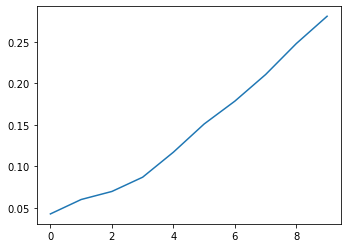

In [55]:
train_model_with_plot(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

This error is not so importatnt we forgot that we have plot function in our train function but the dimentions of train and validation history differ. we will fix that, but 1st we will save our model.



In [57]:
model_16.save(f"saved_models/cnn_16")

INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


Results are promising, training time seams to be ok too  0.31 sec for training and 0.32 sec for training with validation.

We will continue with 10 epochs and validation on each of them to be able to see some plots.
 

In [29]:
EPOCHS = 10
VAL_FREQ = 1

In [41]:
train_model_with_plot(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

NameError: name 'train_model_with_plot' is not defined

#### *I Accidently started th abouve cell and all the data from it is gone* but the results are:

##### After 10 epochs loss: 2.4580 - accuracy: 0.4780 - val_loss: 2.3896 - val_accuracy: 0.4960

This model seam has less loss than CNN-15 and less accuracy, but we hope with more training and because of Random Rotation Random Zoom in big rainge we will have more veriaty in the data and maybe better results than CNN-15 our best model yet.

To improve training we will make function that wont make validations only training and saving results on every 5 epochs.

In [28]:
def train_model_no_validation(model,learning_rate,logs_string,save_string):
    epochs = EPOCHS
    model.compile(optimizer = Adam(learning_rate=learning_rate)
                     ,loss = "sparse_categorical_crossentropy"
                     ,metrics=['accuracy'],)
    history = model.fit(train_ds,
                           epochs=epochs, 
                           callbacks=[TensorBoard(log_dir = f"{logs_string}")], 
                           use_multiprocessing=True,)
    model.save(f"{save_string}")

We will start with 1st 5 and see the time we saved.

In [62]:
EPOCHS = 5

In [63]:
train_model_no_validation(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/5
2557/2557 [==============================] - 805s 314ms/step - loss: 2.4229 - accuracy: 0.4829
Epoch 2/5
2557/2557 [==============================] - 798s 312ms/step - loss: 2.3671 - accuracy: 0.4968
Epoch 3/5
2557/2557 [==============================] - 796s 311ms/step - loss: 2.3194 - accuracy: 0.5106
Epoch 4/5
2557/2557 [==============================] - 797s 312ms/step - loss: 2.2779 - accuracy: 0.5194
Epoch 5/5
2557/2557 [==============================] - 799s 312ms/step - loss: 2.2447 - accuracy: 0.5281
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


We have saved about 8 to 10 sec on epoch is not that crucial, but we will keep it that way.

For now we will restart our PC and go continue in a bit.

**We have stopped our model and now we will start again our work with loading it.**

In [26]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')

First lets start with a single epoch to see that everything works ok.

In [32]:
EPOCHS = 1

In [33]:
train_model_no_validation(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

2557/2557 [==============================] - 800s 308ms/step - loss: 2.2064 - accuracy: 0.5335
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


In [34]:
train_model_no_validation(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

2557/2557 [==============================] - 792s 309ms/step - loss: 2.1692 - accuracy: 0.5455
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


Everything seams in order so we will make 5 itreration by 5 epochs each with validation on every 5th and save also on every 5th epoch.

Hopefuly our hardware will take the presure.

In [25]:
VAL_FREQ = 5
EPOCHS = 5

In [ ]:
for i in range(6):
    train_model(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/5
2557/2557 [==============================] - 791s 308ms/step - loss: 2.1274 - accuracy: 0.5598
Epoch 2/5
2557/2557 [==============================] - 787s 308ms/step - loss: 2.0962 - accuracy: 0.5634
Epoch 3/5
2557/2557 [==============================] - 787s 308ms/step - loss: 2.0579 - accuracy: 0.5727
Epoch 4/5
2557/2557 [==============================] - 788s 308ms/step - loss: 2.0279 - accuracy: 0.5798
Epoch 5/5
2557/2557 [==============================] - 814s 318ms/step - loss: 2.0071 - accuracy: 0.5834 - val_loss: 2.0880 - val_accuracy: 0.5820
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/5
2557/2557 [==============================] - 793s 309ms/step - loss: 1.9842 - accuracy: 0.5874
Epoch 2/5
2557/2557 [==============================] - 787s 308ms/step - loss: 1.9558 - accuracy: 0.5988
Epoch 3/5
2557/2557 [==============================] - 788s 308ms/step - loss: 1.9120 - accuracy: 0.6022
Epoch 4/5
2557/2557 [==============================] - 7



We have anothe breakdow but we havent lost much data, we have noticed that the validation accuracy is getting low comapraed to training so maybe the model is not that good as we thought.

We will try to train for another 8h maybe 30 epochs if the trent stays the same maybe we will be back on our previus one on which we have reach 71% validation accuracy.

In [30]:
VAL_FREQ = 1

In [25]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')

In [ ]:
for i in range(6):
    train_model(model_16, 0.001,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/5
2557/2557 [==============================] - 826s 318ms/step - loss: 1.5503 - accuracy: 0.6884 - val_loss: 2.0704 - val_accuracy: 0.6422
Epoch 2/5
2557/2557 [==============================] - 811s 317ms/step - loss: 1.5368 - accuracy: 0.6900 - val_loss: 1.9620 - val_accuracy: 0.6294
Epoch 3/5
2557/2557 [==============================] - 811s 317ms/step - loss: 1.5254 - accuracy: 0.6933 - val_loss: 2.0053 - val_accuracy: 0.6165
Epoch 4/5
2557/2557 [==============================] - 811s 317ms/step - loss: 1.5044 - accuracy: 0.6958 - val_loss: 1.9239 - val_accuracy: 0.6404
Epoch 5/5
2557/2557 [==============================] - 811s 317ms/step - loss: 1.4873 - accuracy: 0.7026 - val_loss: 1.8876 - val_accuracy: 0.6390
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/5
2557/2557 [==============================] - 819s 319ms/step - loss: 1.4801 - accuracy: 0.7068 - val_loss: 2.0468 - val_accuracy: 0.6241
Epoch 2/5
2557/2557 [==============================] - 8

##### After 67 epochs loss: 1.2536 - accuracy: 0.7577 - val_loss: 1.9724 - val_accuracy: 0.6461

It seam that our validation is stuck on 64 65% Accuracy we will leave it at that at the moment.

WE are out of time we spend 10 day of training and testing validationg models we have go 16 trained.

#### The best for now CNN-15 loss: 2.0460 - accuracy: 0.6781 - val_loss: 1.9114 - val_accuracy: 0.7180

## 9. Tuning the best models  

### CNN-10 CNN-15 and CNN-16

WE will try to make more of the CNN-10 CNN-15 and CNN-16 they seam to be our best so far.

### 9.1 CNN-10 - more training

We will just give one more shot on CNN-10 we seamd to have close results on train and validation we will give it 10 epochs to see if validaion can keep up with accuracy on CNN-10

In [29]:
model_10 = tf.keras.models.load_model('saved_models/cnn_10')

Epoch 1/10
2557/2557 [==============================] - 243s 94ms/step - loss: 2.8434 - accuracy: 0.5327 - val_loss: 2.9771 - val_accuracy: 0.5211
Epoch 2/10
2557/2557 [==============================] - 238s 93ms/step - loss: 2.8080 - accuracy: 0.5431 - val_loss: 2.8766 - val_accuracy: 0.5420
Epoch 3/10
2557/2557 [==============================] - 238s 93ms/step - loss: 2.7636 - accuracy: 0.5561 - val_loss: 2.9547 - val_accuracy: 0.5251
Epoch 4/10
2557/2557 [==============================] - 238s 93ms/step - loss: 2.7175 - accuracy: 0.5697 - val_loss: 2.9207 - val_accuracy: 0.5412
Epoch 5/10
2557/2557 [==============================] - 238s 93ms/step - loss: 2.6844 - accuracy: 0.5757 - val_loss: 2.8223 - val_accuracy: 0.5620
Epoch 6/10
2557/2557 [==============================] - 239s 93ms/step - loss: 2.6591 - accuracy: 0.5824 - val_loss: 2.9224 - val_accuracy: 0.5387
Epoch 7/10
2557/2557 [==============================] - 239s 93ms/step - loss: 2.6327 - accuracy: 0.5886 - val_loss: 3

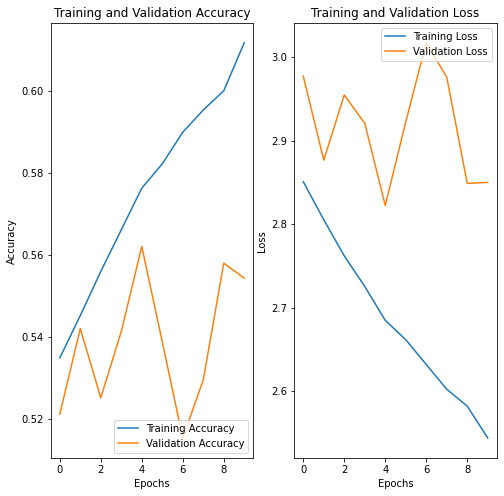

INFO:tensorflow:Assets written to: saved_models/cnn_10\assets


In [34]:
train_model_with_plot(model_10, 0.001,"logs_cnn_10","saved_models/cnn_10")

Epoch 1/10
2557/2557 [==============================] - 246s 95ms/step - loss: 2.5193 - accuracy: 0.6128 - val_loss: 2.9087 - val_accuracy: 0.5509
Epoch 2/10
2557/2557 [==============================] - 240s 94ms/step - loss: 2.5358 - accuracy: 0.6167 - val_loss: 2.8568 - val_accuracy: 0.5598
Epoch 3/10
2557/2557 [==============================] - 237s 93ms/step - loss: 2.4904 - accuracy: 0.6239 - val_loss: 2.9186 - val_accuracy: 0.5474
Epoch 4/10
2557/2557 [==============================] - 236s 92ms/step - loss: 2.4771 - accuracy: 0.6277 - val_loss: 3.2882 - val_accuracy: 0.4838
Epoch 5/10
2557/2557 [==============================] - 237s 92ms/step - loss: 2.4633 - accuracy: 0.6302 - val_loss: 2.7954 - val_accuracy: 0.5723
Epoch 6/10
2557/2557 [==============================] - 237s 93ms/step - loss: 2.4392 - accuracy: 0.6362 - val_loss: 2.7904 - val_accuracy: 0.5734
Epoch 7/10
2557/2557 [==============================] - 241s 94ms/step - loss: 2.4331 - accuracy: 0.6395 - val_loss: 2

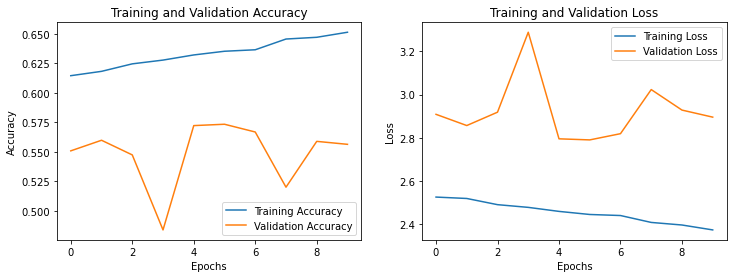

INFO:tensorflow:Assets written to: saved_models/cnn_10\assets


In [37]:
train_model_with_plot(model_10, 0.001,"logs_cnn_10","saved_models/cnn_10")

Afret 20 epoch we are at not in a good place **loss: 2.3737 - accuracy: 0.6516 - val_loss: 2.8957 - val_accuracy: 0.5564** to low on training accuracy and the validation accuracy is not even close. This model will not be considered in our best ones.

So for further tuning we will choose **CNN-15** and **CNN-16**.

### 9.2 Tuning CNN-15

CNN-15 was our most promising model with over 70% taining and validation accuracy.

First we will load the model and continue with 10 epochs of training with the same hyperparameters to see if it can do better with just more training.

In [38]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')

Epoch 1/10
2557/2557 [==============================] - 740s 287ms/step - loss: 2.0481 - accuracy: 0.6778 - val_loss: 2.3907 - val_accuracy: 0.6230
Epoch 2/10
2557/2557 [==============================] - 732s 286ms/step - loss: 2.0197 - accuracy: 0.6857 - val_loss: 2.4322 - val_accuracy: 0.6205
Epoch 3/10
2557/2557 [==============================] - 731s 286ms/step - loss: 2.0173 - accuracy: 0.6830 - val_loss: 2.3945 - val_accuracy: 0.6218
Epoch 4/10
2557/2557 [==============================] - 732s 286ms/step - loss: 2.0051 - accuracy: 0.6861 - val_loss: 2.4315 - val_accuracy: 0.6195
Epoch 5/10
2557/2557 [==============================] - 732s 286ms/step - loss: 2.0066 - accuracy: 0.6905 - val_loss: 2.3871 - val_accuracy: 0.6279
Epoch 6/10
2557/2557 [==============================] - 731s 286ms/step - loss: 1.9932 - accuracy: 0.6904 - val_loss: 2.3815 - val_accuracy: 0.6363
Epoch 7/10
2557/2557 [==============================] - 731s 286ms/step - loss: 1.9703 - accuracy: 0.6960 - val_

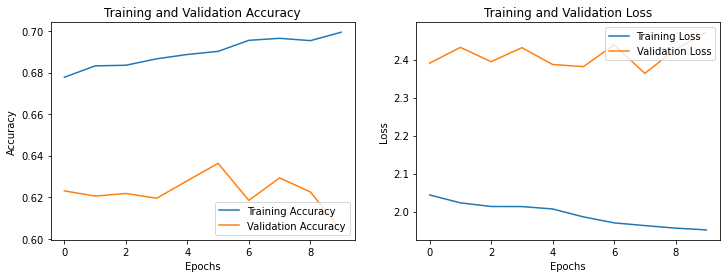

INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


In [39]:
train_model_with_plot(model_15, 0.001,"logs_cnn_15","saved_models/cnn_15")

Bad results **loss: 1.9448 - accuracy: 0.7022 - val_loss: 2.4720 - val_accuracy: 0.6042** we had an expectation of more training accurasy but this drop on validation wes unexpected.

We need to do something different, we will reduce the learning rate from 0.001 to 0.0001 so finer tuning.

Hopefuly the model wi do better.

####  Reduction of learning rate from 0.001 to 0.0001

WE will start with raining for 5 epochs

In [40]:
EPOCHS = 5

Epoch 1/5
2557/2557 [==============================] - 738s 288ms/step - loss: 1.5369 - accuracy: 0.7506 - val_loss: 1.6492 - val_accuracy: 0.6905
Epoch 2/5
2557/2557 [==============================] - 733s 287ms/step - loss: 1.1429 - accuracy: 0.7865 - val_loss: 1.5402 - val_accuracy: 0.6934
Epoch 3/5
2557/2557 [==============================] - 733s 287ms/step - loss: 1.0315 - accuracy: 0.7962 - val_loss: 1.4965 - val_accuracy: 0.6963
Epoch 4/5
2557/2557 [==============================] - 733s 287ms/step - loss: 0.9824 - accuracy: 0.8026 - val_loss: 1.4881 - val_accuracy: 0.6916
Epoch 5/5
2557/2557 [==============================] - 734s 287ms/step - loss: 0.9579 - accuracy: 0.8025 - val_loss: 1.4829 - val_accuracy: 0.6943


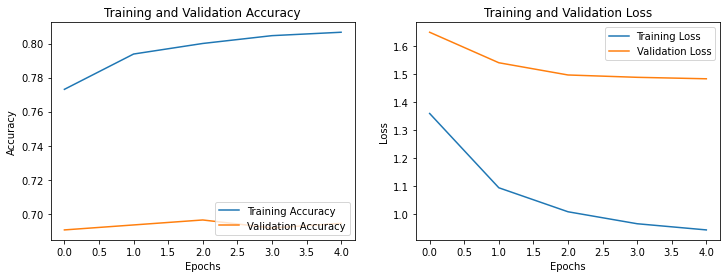

INFO:tensorflow:Assets written to: saved_models/cnn_15\assets


In [41]:
train_model_with_plot(model_15, 0.0001,"logs_cnn_15","saved_models/cnn_15")

##### Training loss: 0.9579 - accuracy: 0.8025 
##### Vailidation loss: 1.4829 - accuracy: 0.6943

Realy good results Loss droped two times Accuracy went to 80%, vaidation accuracy is still a concern with just 69%.

For now we will continue with 10 epochs if training same hyperparameters.

In [ ]:
model_15 = tf.keras.models.load_model('saved_models/cnn_15')
for i in range(8):
    train_model(model_15, 0.0001,"logs_cnn_15","saved_models/cnn_15")

Epoch 1/2
2557/2557 [==============================] - 735s 286ms/step - loss: 0.9236 - accuracy: 0.8115 - val_loss: 1.4698 - val_accuracy: 0.6961
Epoch 2/2
2557/2557 [==============================] - 729s 285ms/step - loss: 0.9137 - accuracy: 0.8132 - val_loss: 1.4739 - val_accuracy: 0.6941
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets
Epoch 1/2
2557/2557 [==============================] - 737s 287ms/step - loss: 0.8934 - accuracy: 0.8171 - val_loss: 1.4670 - val_accuracy: 0.6975
Epoch 2/2
2557/2557 [==============================] - 733s 287ms/step - loss: 0.8949 - accuracy: 0.8154 - val_loss: 1.4567 - val_accuracy: 0.7005
INFO:tensorflow:Assets written to: saved_models/cnn_15\assets
Epoch 1/2
2557/2557 [==============================] - 740s 288ms/step - loss: 0.8876 - accuracy: 0.8176 - val_loss: 1.4598 - val_accuracy: 0.7002
Epoch 2/2
2557/2557 [==============================] - 735s 288ms/step - loss: 0.8802 - accuracy: 0.8196 - val_loss: 1.4654 - val_accuracy: 0

##### Training loss: 0.8524 - accuracy: 0.8246
##### Vailidation loss: 1.4808 - val_accuracy: 0.6939

Results are not so good as we hped so  Accuracy went to 83%, vaidation accuracy is still just 69%. Maybe this model is at its limist we will continue with CNN-16

### 9.3 Tuning CNN-16

We will make 10 epoches with learning rate of 0.0001.

In [29]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')

In [32]:
train_model_with_plot(model_16, 0.0001,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/10
2557/2557 [==============================] - 836s 322ms/step - loss: 1.0397 - accuracy: 0.7978 - val_loss: 1.5923 - val_accuracy: 0.6916
Epoch 2/10
2557/2557 [==============================] - 825s 323ms/step - loss: 0.8639 - accuracy: 0.8250 - val_loss: 1.5528 - val_accuracy: 0.6928
Epoch 3/10
2557/2557 [==============================] - 825s 323ms/step - loss: 0.7957 - accuracy: 0.8329 - val_loss: 1.5518 - val_accuracy: 0.6933
Epoch 4/10
2557/2557 [==============================] - 824s 322ms/step - loss: 0.7572 - accuracy: 0.8379 - val_loss: 1.5345 - val_accuracy: 0.6920
Epoch 5/10
2557/2557 [==============================] - 826s 323ms/step - loss: 0.7361 - accuracy: 0.8413 - val_loss: 1.5052 - val_accuracy: 0.6955
Epoch 6/10
2557/2557 [==============================] - 825s 323ms/step - loss: 0.7075 - accuracy: 0.8455 - val_loss: 1.5079 - val_accuracy: 0.6947
Epoch 7/10
2557/2557 [==============================] - 825s 323ms/step - loss: 0.6972 - accuracy: 0.8466 - val_

NameError: name 'display_history' is not defined

Other than I forgot to initialize the display_history() dunction, we stay at the same level 

##### Training loss: 0.6624 - accuracy: 0.8534
##### Vailidation loss: 1.4978 - val_accuracy: 0.6992

Validatation with not move from the 69% 70% percent mark.

In [33]:
model_16.save('saved_models/cnn_16')

INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


we will do one more thing reducing the learining rate with 5 times more to 0.00002. WE will just make one epoch to see how it goes.

In [31]:
VAL_FREQ = 1
EPOCHS = 1
train_model(model_16, 0.00002,"logs_cnn_16","saved_models/cnn_16")

2557/2557 [==============================] - 839s 324ms/step - loss: 0.6257 - accuracy: 0.8600 - val_loss: 1.4769 - val_accuracy: 0.6992
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets


Well resulst are 0.7 % better for accuracy but validation is the same. 

We will do some more training with learning rate of  0.00002 and  0.00001

In [27]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')
for i in range(8):
    train_model(model_16, 0.00002,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/2
2557/2557 [==============================] - 821s 320ms/step - loss: 0.6263 - accuracy: 0.8620 - val_loss: 1.4745 - val_accuracy: 0.6994
Epoch 2/2
2557/2557 [==============================] - 812s 318ms/step - loss: 0.6206 - accuracy: 0.8605 - val_loss: 1.4757 - val_accuracy: 0.6996
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/2
2557/2557 [==============================] - 817s 319ms/step - loss: 0.6146 - accuracy: 0.8626 - val_loss: 1.4816 - val_accuracy: 0.6986
Epoch 2/2
2557/2557 [==============================] - 812s 317ms/step - loss: 0.6072 - accuracy: 0.8637 - val_loss: 1.4845 - val_accuracy: 0.6973
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/2
2557/2557 [==============================] - 818s 319ms/step - loss: 0.6111 - accuracy: 0.8622 - val_loss: 1.4773 - val_accuracy: 0.6978
Epoch 2/2
2557/2557 [==============================] - 812s 318ms/step - loss: 0.6067 - accuracy: 0.8642 - val_loss: 1.4736 - val_accuracy: 0

In [26]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')
for i in range(8):
    train_model(model_16, 0.00001,"logs_cnn_16","saved_models/cnn_16")

Epoch 1/2
2557/2557 [==============================] - 827s 319ms/step - loss: 0.5766 - accuracy: 0.8690 - val_loss: 1.4748 - val_accuracy: 0.6983
Epoch 2/2
2557/2557 [==============================] - 812s 318ms/step - loss: 0.5704 - accuracy: 0.8723 - val_loss: 1.4807 - val_accuracy: 0.6972
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/2
2557/2557 [==============================] - 817s 318ms/step - loss: 0.5699 - accuracy: 0.8704 - val_loss: 1.4767 - val_accuracy: 0.6985
Epoch 2/2
2557/2557 [==============================] - 809s 316ms/step - loss: 0.5706 - accuracy: 0.8712 - val_loss: 1.4780 - val_accuracy: 0.6973
INFO:tensorflow:Assets written to: saved_models/cnn_16\assets
Epoch 1/2
2557/2557 [==============================] - 816s 318ms/step - loss: 0.5727 - accuracy: 0.8721 - val_loss: 1.4814 - val_accuracy: 0.6971
Epoch 2/2
2557/2557 [==============================] - 810s 317ms/step - loss: 0.5657 - accuracy: 0.8712 - val_loss: 1.4783 - val_accuracy: 0

##### Training loss: 0.5576 - accuracy: 0.8720
##### Vailidation loss: 1.4812 - val_accuracy: 0.6971

Those are our best result Validation did not move but Training keep getting better.

Now we will do our little test on 3 images.

In [43]:
model_16 = tf.keras.models.load_model('saved_models/cnn_16')

This image most likely belongs to pizza with a 2.4689162150025368 percent confidence.


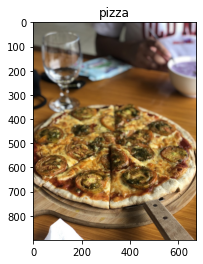

This image most likely belongs to cup_cakes with a 2.117641642689705 percent confidence.


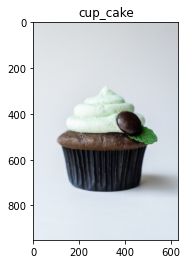

This image most likely belongs to ice_cream with a 2.4226978421211243 percent confidence.


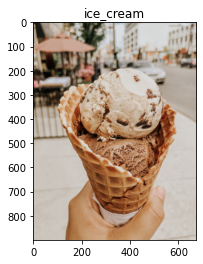

In [34]:
prediction_confindence(model_16,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_16,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_16,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

**"Best" results yet** 3/3 Confidence on 1 and 3 almost 2.5 % and on 2 2.1%.

For now we will keep this model in mind.


Since we dont have time for new traing we will try some tranfer learning.

## 10. Tranfer Learning

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. This area of research bears some relation to the long history of psychological literature on transfer of learning, although formal ties between the two fields are limited

In our case **we will use our trained model CNN-16** take its layers from the begining to the output of the flatten layer, and **appply to them same layers from the original model with one difference adding 10 time more regularization** hopefuly this weill reduce the gap between validation and training accuracy.

### 10.1 TL model 1

First lets see how our mordel looks like, to do that we will print the layers of it.

In [33]:
for i, layer in enumerate(model_16.layers):
    print(i, layer.name)

0 random_flip_11
1 random_rotation_11
2 random_zoom_11
3 rescaling_11
4 conv2d_101
5 batch_normalization_134
6 conv2d_102
7 max_pooling2d_63
8 batch_normalization_135
9 conv2d_103
10 batch_normalization_136
11 conv2d_104
12 max_pooling2d_64
13 batch_normalization_137
14 conv2d_105
15 batch_normalization_138
16 conv2d_106
17 max_pooling2d_65
18 batch_normalization_139
19 conv2d_107
20 batch_normalization_140
21 conv2d_108
22 max_pooling2d_66
23 batch_normalization_141
24 conv2d_109
25 batch_normalization_142
26 conv2d_110
27 max_pooling2d_67
28 batch_normalization_143
29 conv2d_111
30 batch_normalization_144
31 conv2d_112
32 max_pooling2d_68
33 batch_normalization_145
34 flatten_11
35 batch_normalization_146
36 dense_34
37 dropout_23
38 batch_normalization_147
39 dense_35
40 dropout_24
41 batch_normalization_148
42 dense_36


So we will take everthing from 1st to the output of  35th. 

In [44]:
model_16_transfer = Model(inputs = model_16.layers[0].input, outputs = model_16.layers[34].output)

We dont want the layers we took from CNN-16 to train again so we will skip that.

In [45]:
for layer in model_16_transfer.layers:
    layer.trainable = False

Not lets see what we have.

In [46]:
model_16_transfer.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_11_input (InputL [(None, 256, 256, 3)]     0         
_________________________________________________________________
random_flip_11 (RandomFlip)  (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_11 (RandomRo (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom_11 (RandomZoom)  (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_134 (Bat (None, 256, 256, 32)      128   

The model look Ok Trainable params: 0

All we need to do now is murge it with the last dance layers with the **changed regularization we have planed from 0.01 to 0.1.**

In [41]:
model_16_transfer_model = Sequential([
    model_16_transfer,
    layers.BatchNormalization(),
    layers.Dense(256,activation = "relu",  kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1)),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(256,activation = "relu",  kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1)),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(num_classes,activation = "softmax", kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1))
])

The model is ready we will train it for **15 epoch with different learning rates trating from 0.001 to 0.0002 to 0.00004 - 5 each.**

*Training with 0.001 and 0.0002 learning rate are missing from this notebook because I did not initialize plotinig function.*

Epoch 1/5
2557/2557 [==============================] - 366s 142ms/step - loss: 0.9253 - accuracy: 0.8519 - val_loss: 1.5835 - val_accuracy: 0.6928
Epoch 2/5
2557/2557 [==============================] - 361s 141ms/step - loss: 0.8487 - accuracy: 0.8527 - val_loss: 1.5715 - val_accuracy: 0.6944
Epoch 3/5
2557/2557 [==============================] - 361s 141ms/step - loss: 0.8396 - accuracy: 0.8538 - val_loss: 1.5704 - val_accuracy: 0.6908
Epoch 4/5
2557/2557 [==============================] - 359s 141ms/step - loss: 0.8347 - accuracy: 0.8526 - val_loss: 1.5730 - val_accuracy: 0.6896
Epoch 5/5
2557/2557 [==============================] - 359s 140ms/step - loss: 0.8292 - accuracy: 0.8537 - val_loss: 1.5726 - val_accuracy: 0.6898


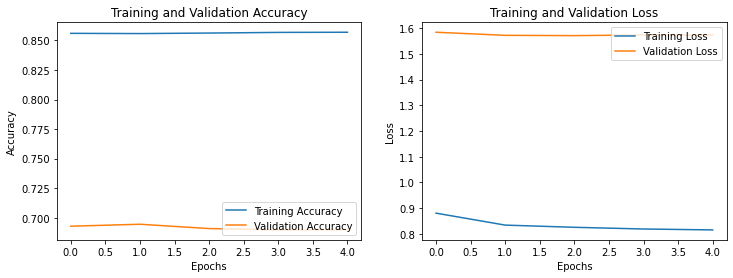

INFO:tensorflow:Assets written to: saved_models/cnn_16_transfer\assets


In [46]:
VAL_FREQ = 1
EPOCHS = 5
train_model_with_plot(model_16_transfer_model, 0.00004,"logs_cnn_16_transfer","saved_models/cnn_16_transfer")

This image most likely belongs to pizza with a 2.2823387756943703 percent confidence.


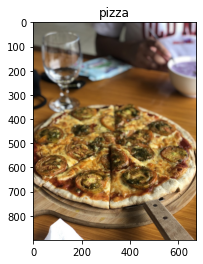

This image most likely belongs to cup_cakes with a 2.1113980561494827 percent confidence.


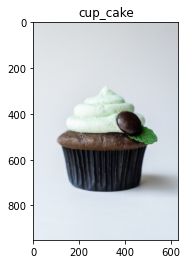

This image most likely belongs to ice_cream with a 2.133144624531269 percent confidence.


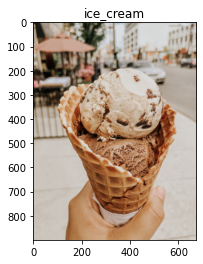

In [50]:
prediction_confindence(model_16_transfer_model,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(model_16_transfer_model,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(model_16_transfer_model,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

The model we called **model_16_transfer_model** did good on the 3 images we got for a small test 3/3 with over just 2% confidence *

CNN-16 got better results.

### 10.2 TL model 2

For this model we will increace the dropout between the 3 dence layers at the end, regularization stays at 0.1. We hope that this will help the model to generalize better and increace validation accuracy.


In [49]:
model_16_transfer_model_2 = Sequential([
    model_16_transfer,
    layers.BatchNormalization(),
    layers.Dense(256,activation = "relu",  kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(256,activation = "relu",  kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(num_classes,activation = "softmax", kernel_regularizer = regularizers.l2(0.1), bias_regularizer = regularizers.l2(0.1))
])

model_16_transfer_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 16384)             18886176  
_________________________________________________________________
batch_normalization_6 (Batch (None, 16384)             65536     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

Just over 4 300 000 params should be fast.

Epoch 1/5
2557/2557 [==============================] - 271s 105ms/step - loss: 9.8725 - accuracy: 0.5348 - val_loss: 4.4752 - val_accuracy: 0.6458
Epoch 2/5
2557/2557 [==============================] - 266s 104ms/step - loss: 4.1678 - accuracy: 0.7037 - val_loss: 3.8888 - val_accuracy: 0.6597
Epoch 3/5
2557/2557 [==============================] - 267s 104ms/step - loss: 3.6769 - accuracy: 0.7155 - val_loss: 3.7327 - val_accuracy: 0.6589
Epoch 4/5
2557/2557 [==============================] - 267s 105ms/step - loss: 3.4410 - accuracy: 0.7205 - val_loss: 3.6043 - val_accuracy: 0.6583
Epoch 5/5
2557/2557 [==============================] - 267s 104ms/step - loss: 3.2944 - accuracy: 0.7172 - val_loss: 3.4321 - val_accuracy: 0.6645


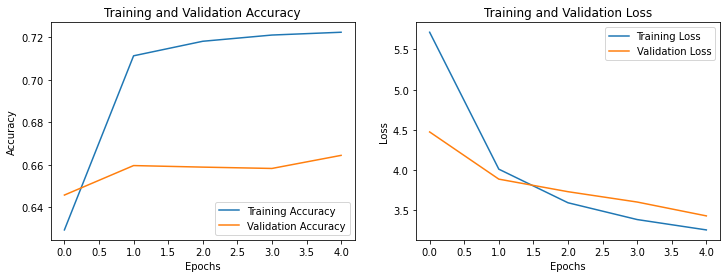

INFO:tensorflow:Assets written to: saved_models/cnn_16_transfer_2\assets


In [50]:
VAL_FREQ = 1
EPOCHS = 5
train_model_with_plot(model_16_transfer_model_2, 0.001,"logs_cnn_16_transfer_2","saved_models/cnn_16_transfer_2")

Epoch 1/5
2557/2557 [==============================] - 272s 106ms/step - loss: 1.8928 - accuracy: 0.7951 - val_loss: 2.0520 - val_accuracy: 0.6837
Epoch 2/5
2557/2557 [==============================] - 268s 105ms/step - loss: 1.5462 - accuracy: 0.8118 - val_loss: 2.0419 - val_accuracy: 0.6852
Epoch 3/5
2557/2557 [==============================] - 269s 105ms/step - loss: 1.5250 - accuracy: 0.8094 - val_loss: 2.0212 - val_accuracy: 0.6894
Epoch 4/5
2557/2557 [==============================] - 269s 105ms/step - loss: 1.4971 - accuracy: 0.8122 - val_loss: 2.0200 - val_accuracy: 0.6864
Epoch 5/5
2557/2557 [==============================] - 269s 105ms/step - loss: 1.4857 - accuracy: 0.8100 - val_loss: 2.0268 - val_accuracy: 0.6837


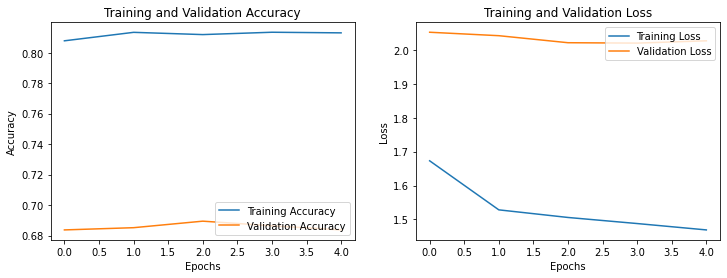

INFO:tensorflow:Assets written to: saved_models/cnn_16_transfer_2\assets


In [51]:
train_model_with_plot(model_16_transfer_model_2, 0.0002,"logs_cnn_16_transfer_2","saved_models/cnn_16_transfer_2")

Epoch 1/5
2557/2557 [==============================] - 273s 106ms/step - loss: 1.2587 - accuracy: 0.8253 - val_loss: 1.6984 - val_accuracy: 0.6953
Epoch 2/5
2557/2557 [==============================] - 270s 105ms/step - loss: 1.1073 - accuracy: 0.8342 - val_loss: 1.6722 - val_accuracy: 0.6949
Epoch 3/5
2557/2557 [==============================] - 272s 106ms/step - loss: 1.0792 - accuracy: 0.8383 - val_loss: 1.6586 - val_accuracy: 0.6939
Epoch 4/5
2557/2557 [==============================] - 271s 106ms/step - loss: 1.0593 - accuracy: 0.8377 - val_loss: 1.6521 - val_accuracy: 0.6976
Epoch 5/5
2557/2557 [==============================] - 273s 107ms/step - loss: 1.0577 - accuracy: 0.8365 - val_loss: 1.6497 - val_accuracy: 0.6962


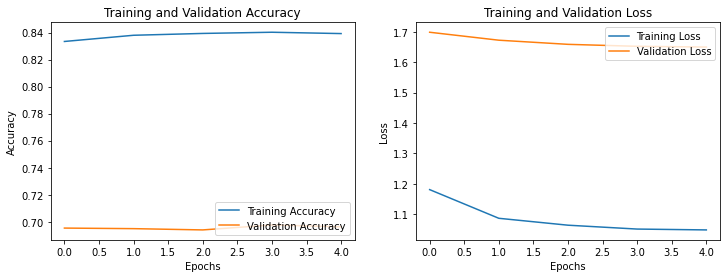

INFO:tensorflow:Assets written to: saved_models/cnn_16_transfer_2\assets


In [52]:
train_model_with_plot(model_16_transfer_model_2, 0.00004,"logs_cnn_16_transfer_2","saved_models/cnn_16_transfer_2")

Epoch 1/5
2557/2557 [==============================] - 280s 109ms/step - loss: 1.1024 - accuracy: 0.8389 - val_loss: 1.6158 - val_accuracy: 0.7004
Epoch 2/5
2557/2557 [==============================] - 277s 108ms/step - loss: 1.0534 - accuracy: 0.8429 - val_loss: 1.6079 - val_accuracy: 0.6991
Epoch 3/5
2557/2557 [==============================] - 277s 108ms/step - loss: 1.0225 - accuracy: 0.8432 - val_loss: 1.5977 - val_accuracy: 0.7000
Epoch 4/5
2557/2557 [==============================] - 277s 108ms/step - loss: 1.0012 - accuracy: 0.8448 - val_loss: 1.5867 - val_accuracy: 0.7013
Epoch 5/5
2557/2557 [==============================] - 276s 108ms/step - loss: 0.9937 - accuracy: 0.8426 - val_loss: 1.5809 - val_accuracy: 0.7001


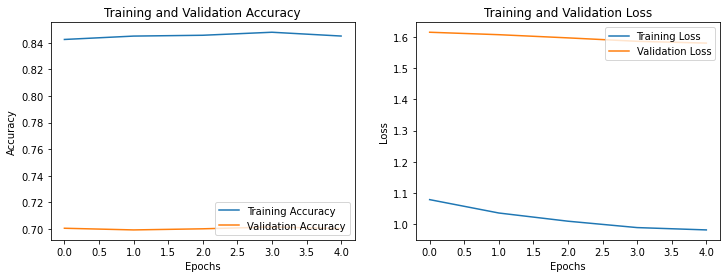

INFO:tensorflow:Assets written to: saved_models/cnn_16_transfer_2\assets


In [58]:
train_model_with_plot(model_16_transfer_model_2, 0.00001,"logs_cnn_16_transfer_2","saved_models/cnn_16_transfer_2")

In [52]:
cnn_16_transfer_2 = tf.keras.models.load_model('saved_models/cnn_16_transfer_2')

This image most likely belongs to pizza with a 2.3017778992652893 percent confidence.


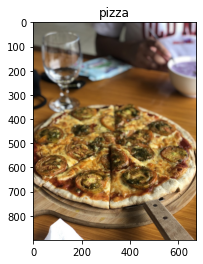

This image most likely belongs to cup_cakes with a 1.966330036520958 percent confidence.


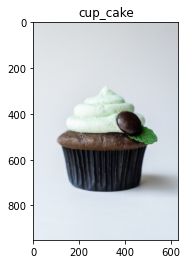

This image most likely belongs to ice_cream with a 1.9686240702867508 percent confidence.


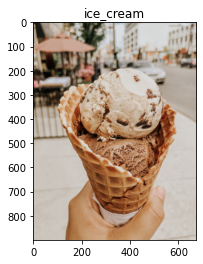

In [55]:
prediction_confindence(cnn_16_transfer_2,IMAGE_HEIGH,IMAGE_WIDTH, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence(cnn_16_transfer_2,IMAGE_HEIGH,IMAGE_WIDTH, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence(cnn_16_transfer_2,IMAGE_HEIGH,IMAGE_WIDTH, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

##### Training loss: 0.9937 - accuracy: 0.8426
##### Vailidation loss: 1.5809 - val_accuracy: 0.7001

The model **model_16_transfer_model_2** did not so good on as the previus model the 3 images are predicted 3/3 correctly with just under 2% confidence and one 2.3% tre previus model was better and the best is still CNN-16.


### 10.3 VGG19 transfer model 

VGG-19 is a convolutional neural network that is 19 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

VGG19 transfer model First we will load vgg19 model and see its achitecture.

####  10.3.1 Create VGG19 transfer model 

In [ ]:
vgg_model = vgg19.VGG19()

In [5]:
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 flatten
23 fc1
24 fc2
25 predictions


As we did beffore we will use all the leayrs till flattens output, and we will not train them se we must set "trainable" to False.

In [6]:
vgg_transfer = Model(inputs = vgg_model.layers[0].input, outputs = vgg_model.layers[22].output)

In [7]:
for layer in vgg_transfer.layers:
    layer.trainable = False

In [8]:
vgg_transfer.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We have our model so no lets put our leayers. We will add 3 dence layers.

In [9]:
vgg_transfer_model = Sequential([
    vgg_transfer,
    layers.Dense(224,activation = "relu"),
    layers.Dense(224,activation = "relu"),
    layers.Dense(101,activation = "softmax")
])

vgg_transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 25088)             20024384  
_________________________________________________________________
dense (Dense)                (None, 224)               5619936   
_________________________________________________________________
dense_1 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_2 (Dense)              (None, 101)               22725     
Total params: 25,717,445
Trainable params: 5,693,061
Non-trainable params: 20,024,384
_________________________________________________________________


Our model is ready.

But we forgot very important thing out **cached data is with different image sizes**...

So we must make new dataset and new chace for specialy for this model. this model

####  10.3.2 Create Data for VGG19 transfer model 
We will just do again the previous step of making image_dataset_from_directory and splitting it

In [10]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIR,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 101000 files belonging to 101 classes.


We have our images 101000 to 101 classes.

In [11]:
num_classes = len(ds.class_names)
class_names = ds.class_names

In [12]:
DATASET_SIZE= len(ds.file_paths)

In [13]:
DATASET_SIZE

101000

Now we nned to split the dataset to one for train one for validation and one for testing. We will use 80% of the data for training and 10% fo validation and testing.

In [14]:
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.1 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

In [15]:
print(train_size / batch_size)
print(val_size  / batch_size)
print(test_size / batch_size)

2525.0
315.625
315.625


So the data in not evenly split so we will just take 300 batches for test and validation other will go to training (2557).

In [16]:
train_ds = ds.take(2557)
test_ds = ds.skip(2557)
val_ds = test_ds.skip(300)
test_ds = test_ds.take(300)

In [17]:
len(train_ds)

2557

In [18]:
len(test_ds)

300

In [19]:
len(val_ds)

300

Now we will do the cache for train and validation datasets.

In [20]:
train_ds = train_ds.cache(filename='cache_224').prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
val_ds = val_ds.cache(filename='val_cache_224').prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
train_ds

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [23]:
val_ds

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

####  10.3.3 Train VGG19 transfer model 

First we will make 5 epoch with learning rate of 0.001 and see how it goes.

Epoch 1/5
2557/2557 [==============================] - 1549s 603ms/step - loss: 5.2182 - accuracy: 0.0104 - val_loss: 4.6225 - val_accuracy: 0.0105
Epoch 2/5
2557/2557 [==============================] - 496s 194ms/step - loss: 4.6896 - accuracy: 0.0129 - val_loss: 4.6068 - val_accuracy: 0.0102
Epoch 3/5
2557/2557 [==============================] - 496s 194ms/step - loss: 5.1742 - accuracy: 0.0131 - val_loss: 4.6144 - val_accuracy: 0.0087
Epoch 4/5
2557/2557 [==============================] - 497s 194ms/step - loss: 5.0931 - accuracy: 0.0132 - val_loss: 4.6057 - val_accuracy: 0.0109
Epoch 5/5
2557/2557 [==============================] - 497s 194ms/step - loss: 4.8704 - accuracy: 0.0149 - val_loss: 4.4501 - val_accuracy: 0.0201


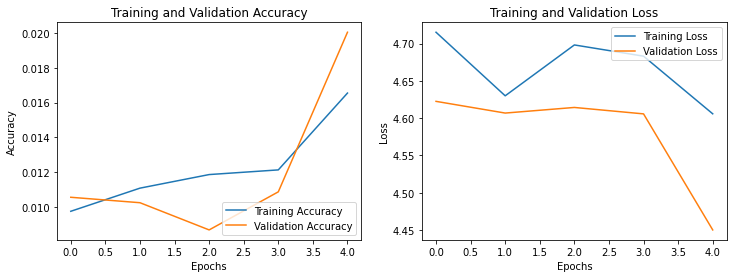

INFO:tensorflow:Assets written to: saved_models/vgg_transfer_2\assets


In [26]:
VAL_FREQ = 1
EPOCHS = 5
train_model_with_plot(vgg_transfer_model, 0.001,"vgg_transfer_2","saved_models/vgg_transfer_2")

It looks **Terrible** there is clearly something wrong that we do so, will just give it one more try with learning rate of 0.01

Epoch 1/5
2557/2557 [==============================] - 485s 189ms/step - loss: 4.7412 - accuracy: 0.0119 - val_loss: 4.6223 - val_accuracy: 0.0095
Epoch 2/5
2557/2557 [==============================] - 485s 190ms/step - loss: 6.5947 - accuracy: 0.0100 - val_loss: 4.6223 - val_accuracy: 0.0095
Epoch 3/5
2557/2557 [==============================] - 485s 190ms/step - loss: 11.5666 - accuracy: 0.0094 - val_loss: 4.6223 - val_accuracy: 0.0095
Epoch 4/5
2557/2557 [==============================] - 485s 190ms/step - loss: 6.0681 - accuracy: 0.0096 - val_loss: 4.6223 - val_accuracy: 0.0095
Epoch 5/5
2557/2557 [==============================] - 486s 190ms/step - loss: 4.6194 - accuracy: 0.0094 - val_loss: 4.6223 - val_accuracy: 0.0095


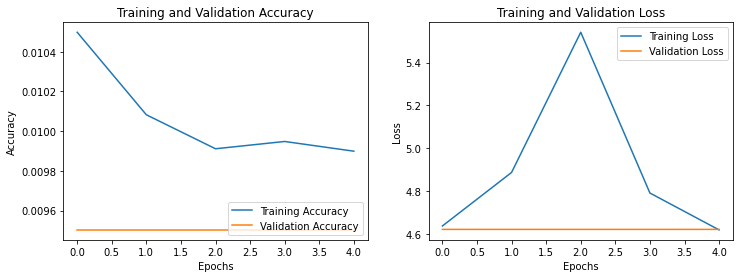

INFO:tensorflow:Assets written to: saved_models/vgg_transfer_2\assets


In [27]:
VAL_FREQ = 1
EPOCHS = 5
train_model_with_plot(vgg_transfer_model, 0.01,"vgg_transfer_2","saved_models/vgg_transfer_2")

It looks **Terrible**  again, we will make one last try and we will change the optimizer to RMSprop to see if Adam just bounces back and forward but this is **highly unlikely**.

In [29]:
FIG_SIZE_WIDTH = 12
FIG_SIZE_HEIGH = 4

def train_model_with_plot_RSM(model,learning_rate,logs_string,save_string):
    epochs = EPOCHS
    model.compile(optimizer = RMSprop(learning_rate=learning_rate)
                     ,loss = "sparse_categorical_crossentropy"
                     ,metrics=['accuracy'],)
    history = model.fit(train_ds,
                           epochs=epochs, 
                           validation_data=val_ds,
                           callbacks=[TensorBoard(log_dir = f"{logs_string}")], 
                           use_multiprocessing=True,
                           validation_freq=VAL_FREQ)
    display_history(history,epochs)
    model.save(f"{save_string}")

W3 will train for 5 epochs.

Epoch 1/5
2557/2557 [==============================] - 497s 194ms/step - loss: 4.6178 - accuracy: 0.0099 - val_loss: 4.6178 - val_accuracy: 0.0081
Epoch 2/5
2557/2557 [==============================] - 495s 193ms/step - loss: 4.6155 - accuracy: 0.0101 - val_loss: 4.6171 - val_accuracy: 0.0081
Epoch 3/5
2557/2557 [==============================] - 497s 194ms/step - loss: 4.6153 - accuracy: 0.0094 - val_loss: 4.6170 - val_accuracy: 0.0081
Epoch 4/5
2557/2557 [==============================] - 498s 195ms/step - loss: 4.6152 - accuracy: 0.0095 - val_loss: 4.6170 - val_accuracy: 0.0081
Epoch 5/5
2557/2557 [==============================] - 498s 195ms/step - loss: 4.6152 - accuracy: 0.0095 - val_loss: 4.6170 - val_accuracy: 0.0081


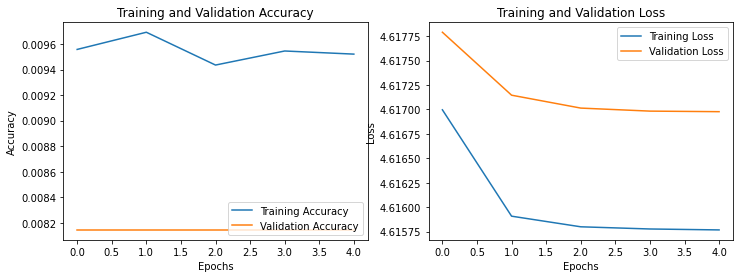

INFO:tensorflow:Assets written to: saved_models/vgg_transfer_2\assets


In [30]:
train_model_with_plot_RSM(vgg_transfer_model, 0.001,"vgg_transfer_2","saved_models/vgg_transfer_2")

There is something clearly wrong with this tranfer model we dont have much time so we wil leave it.

## 11. Use the base VGG-19 Model

We will use VGG-19 Model model in its entirety, to se how it performs on our imigest to make some coperations to our work.

In [49]:
def prediction_confindence_vgg(model,height,width,title,url):
    file_url = f"{url}"
    file_path = tf.keras.utils.get_file(f'{title}', origin=file_url)

    # load an image from file
    image = load_img(file_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))
    
        
    image = imread(file_path)
    plt.imshow(image)
    plt.title(title)
    plt.show()

We have our function now lets see the results.

pizza (27.60%)


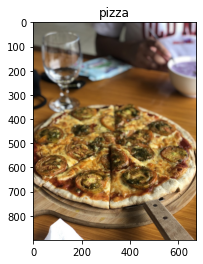

ice_cream (10.82%)


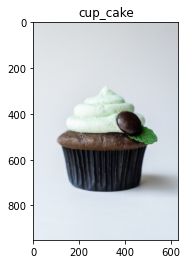

ice_cream (96.08%)


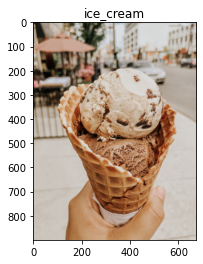

In [50]:
prediction_confindence_vgg(vgg_model,224,224, "pizza", "https://images.unsplash.com/photo-1591786775823-b15f1dd2b215?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")
prediction_confindence_vgg(vgg_model,224,224, "cup_cake", "https://images.unsplash.com/photo-1587668178277-295251f900ce?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80")
prediction_confindence_vgg(vgg_model,224,224, "ice_cream", "https://images.unsplash.com/photo-1576506295286-5cda18df43e7?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80")

**Now this is how results shood look like Confidence in 2 digitst andon ice cream 93% great, but it seams Cup cake is not one of the 1000 classes in VGG19.**

With many hours of work more computing power maybe some day we can hopefuly go to the half ot these result but for now we will rest with ours.

## 12. Test the best model

This is the tensorboard information for our best models.

### CNN-10 Model

##### Training loss: 2.3737 - accuracy: 0.6516
##### Vailidation loss: 2.8957 - val_accuracy: 0.5564

![alt text](cnn10.png)

### CNN-15 Model

##### Training loss: 0.8524 - accuracy: 0.8246
##### Vailidation loss: 1.4808 - val_accuracy: 0.6939

![alt text](cnn15.png)

### CNN-16 Model

##### Training loss: 0.5576 - accuracy: 0.8720
##### Vailidation loss: 1.4812 - val_accuracy: 0.6971

![alt text](cnn16.png)

### CNN-16 TL-2 Model

##### Training loss: 0.9937 - accuracy: 0.8426
##### Vailidation loss: 1.5809 - val_accuracy: 0.7001

![alt text](cnn16_transfer.png)



## Our best model is CNN-16 

We just have 2 steps here we will load it and evaluate right after.

In [36]:
cnn_16 = tf.keras.models.load_model('saved_models/cnn_16')

In [76]:
cnn_16.evaluate(test_ds)

300/300 [==============================] - 736s 333ms/step - loss: 1.5231 - accuracy: 0.6939


[1.5231471061706543, 0.6938541531562805]

### Result - 69.3854 % Accuracy

The test accuracy is not much different from the validation, so this is what we have expected.

## 13. Compare results

We will compair our result with some result of Kaggle for notebooks that are done on the same dataset.

### 13.1 Results from **anasiri** - Apr 25, 2020

https://github.com/anasiri/Food-Classifier/blob/master/food_cluster%20-%20resnet.ipynb

accuracy on training images: **0.7046205**
loss on training images: **1.113277370948078**
        
accuracy on validation images: **0.6490099**
loss on validation images: **1.4050724487493533**


### 13.2 Results from Food101-wideresnet-100-2 - 2mo ago

https://www.kaggle.com/pratt3000/food101-wideresnet-100-2

train_loss: **0.2371**

val_loss: **0.5953, val_acc: 0.8456**

### Results from 13.3 PyTorch-vgg13-transfer-learning - 6mo ago

https://www.kaggle.com/micheledifazio/pytorch-vgg13-transfer-learning

train_loss: **0.7559**

val_loss: **1.1580, val_acc: 0.7024**


## 14. Conclusion

We have worked from **5.2.2021 17:00 to 17.2021 20:00 10h to 12h a day the PC has worked 24/7** for that time have reached the resul of **69.3854 % Accuracy**, how good is this compared to the 3 notebooks we got from Kaggle seams **Ok**,but we know that we have **high bias** and **high variance**, and there is a lot of work that can be done to improve our Classification.

What can be done better: maybe image segmentation, maybe use Generative models to increace the count of the images and of cource different hyperparameters on copileing and training the model.

For the model, of couse, it is not ready to classify correctly, but with more time and expirence of Image classification modeling it can be done to work a lot better, then can be applyed to some app.

Then true food and peoples curiosity reduce the culture difference of people around to world.

## 15. References

1. Installing and Running Tensorflow-GPU using Anaconda on Windows - 20.8.2020 Ekemini Okpongkpong
https://medium.com/datadriveninvestor/installing-tensorflow-gpu-using-anaconda-on-windows-ac23b66d05f1
2. Food Images (Food-101) Labeled food images in 101 categories from apple pies to wafflesh - K Scott Mader updated 3 years ago  (Version 5) - https://www.kaggle.com/kmader/food41
3. Release 2.4.1 - mihaimaruseac 28 days ago - https://github.com/tensorflow/tensorflow/blob/r2.4/RELEASE.md
4. Nvidia Deep learning documentation -https://docs.nvidia.com/deeplearning/frameworks/tensorflow-user-guide/index.html
5. Tensorflow documentation https://www.tensorflow.org/
6. Image Classification using Machine Learning and Deep Learning - Islam Hasabo May 2, 2020 - https://medium.com/swlh/image-classification-using-machine-learning-and-deep-learning-2b18bfe4693f
7. Custom Loss and Custom Metrics Using Keras Sequential Model API - Vishnuvardhan Janapati Jun 13, 2020 - https://medium.com/swlh/custom-loss-and-custom-metrics-using-keras-sequential-model-api-d5bcd3a4ff28
8. What is the difference between kernel, bias, and activity regulizers, and when to use which? - Bloc97 Dec 17 '18 at 2:20 - https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t
9. Understanding of Convolutional Neural Network (CNN) — Deep Learning - Prabhu Mar 4, 2018 - https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148
10. Convolutional Neural Networks (CNN): Step 4 - Full Connection - Published by SuperDataScience Team Saturday Aug 18, 2018 - https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-4-full-connection
11. Adam — latest trends in deep learning optimization. - Vitaly Bushaev Oct 22, 2018·16 - https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
12. A Guide to TensorFlow Callbacks - KESHAV AGGARWAL 31 AUG 2020 - https://blog.paperspace.com/tensorflow-callbacks/
13. How to Reduce Training Time for a Deep Learning Model using tf.data - Renu Khandelwal Sep 30, 2020 - https://towardsdatascience.com/how-to-reduce-training-time-for-a-deep-learning-model-using-tf-data-43e1989d2961
14. VGG-19 VGG-19 Pre-trained Model for Keras - Keras updated 3 years ago (Version 2) https://www.kaggle.com/keras/vgg19/home
15. A Gentle Introduction to Batch Normalization for Deep Neural Networks - by Jason Brownlee on January 16, 2019 in Deep Learning Performance - https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
16. How to Use The Pre-Trained VGG Model to Classify Objects in Photographs - by Jason Brownlee on November 8, 2017 in Deep Learning - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
17. How to use L1, L2 and Elastic Net Regularization with TensorFlow 2.0 and Keras? - Chris23 January 2020 - https://www.machinecurve.com/index.php/2020/01/23/how-to-use-l1-l2-and-elastic-net-regularization-with-keras/
